# Choose the Best Machine Learning Model

## Introduction

This tutorial will introduce you to how to choice the best machine learning model in a real case, particularly focusing on Hotel Availability data. This data is from the Expedia Group, which focuses on improving the travel experiences of its customers using cutting-edge innovations in the field. Moreover, they have noticed that customers are not happy with hotels that suddenly become unavailable for booking. A hotel that accepts bookings throughout the year adds value to the Travel Express Platform. Travel Express has decided to fund the hotels based on their commitment to yearly availability.

## Tutorial Content

In this tutorial I will show how to build the basic supervised machine learning model, which is classification model, specifically using [pandas](https://pandas.pydata.org/docs/user_guide/index.html "click on"), [numpy](https://numpy.org/doc/stable/user/index.html#user "click on"), [matplotlib](https://matplotlib.org/ "click on"), [seaborn](https://seaborn.pydata.org/ "click on"), [sklearn](https://scikit-learn.org/stable/), [warnings](https://docs.python.org/3/library/warnings.html "click on").

I will use the data collection from [Expedia Group](https://drive.google.com/file/d/1KY-PoXxdLaizbaJsSgoLZ77AVEkWmm-0/view?usp=sharing "click on").
However, it is not the real case dataset, this is for the practice data set to build the machine learning model.

I will cover the following topics in the tutorial:

1. [Install the libraries](#Install-the-libraries)
2. [Preparing the data](#Preparing-the-data)
3. [Supervised Machine Learning](#Supervised-Machine-Learning)
4. [Choosing a model](#Choosing-a-model)
5. [Training the model](#Training-the-model)
6. [Evaluating the model](#Evaluating-the-model)
7. [Conclusion](#Conclusion)
8. [Reference](#Reference)

# Install the libraries

Before getting started, you will need to install several libraries that we will use. You can install Pandas, matplotlib, seaborn, scikit-learn. The 'warings" is already an automatically built-in environment, so no need to install. If you have already these libraries in your environment be sure it is latest version.

1. Install the libraries in conda:

    conda install package-'name' ; name --- is the library name


2. To check the current package version:

    Example:
    
    import pandas as pd

    print(pd.__version__)

    Or to check the all libraries version:
    
    $ pip list



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preparing the data

[Prepare Data](https://machinelearningmastery.com/how-to-prepare-data-for-machine-learning/ "click on"):

Now that we've installed and loaded the libraries, let's load our first our train data.

Download the Expedi_Data.zip file from the Google Drive: "https://drive.google.com/file/d/1LDUoAPFUFFyBHwGY4yKmYzSQEvYjXUkj/view?usp=sharing". Then unzip the file, there are two separate two CSV files, which are training and testing data. From now, we will use the "training" data first to prepare our data.

1. Select Data:

    We will use the "train" data to our main data analysis
    
    What is "train" data:
    [Training data](https://appen.com/blog/training-data "click on") is used to train an algorithm, typically making up a certain percentage of an overall dataset along with a testing set.
    
    
2. Preproceess Data:

    After you have selected the data, you need to consider that how you are going to use the data.
    
    --- Formatting:
    
    The data you have selected may not suitable in your format, so you need to format the data. For example, the data might be the relational database, so you would like to do flat the file. But in this case, it's already formatted the data for you, just use the panda's function to read the CSV file.
    
    --- [Cleaning](https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide "click on"): 
    
    Cleaning is to removing or fixing the missing value. There are several way to deal with missing value, such as regression analysis imputing, mean or median imputing method, delete missing value.
    
    --- [Sampling](https://www.analyticsvidhya.com/blog/2019/09/data-scientists-guide-8-types-of-sampling-techniques/ "click on"): 
    
    There may be far more selected data available than you need to work with.
    
    
3. Transform Data:

    The final step is transforming data. It is depends which algorithm you are working with.
    
    --- [Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35 "click on"): 
    
    The preprocessed data may contain attributes with a mixtures of scales for various quantities such as dollars, kilograms and sales volume.
    
    --- [Decomposition](https://www.kaggle.com/shivamb/dataset-decomposition-techniques "click on"):
    
    There may be features that represent a complex concept that may be more useful to a machine learning method when split into the constituent parts.
    
    --- [Aggregation](https://towardsdatascience.com/learning-aggregate-functions-5b4102383433 "click on"):
    
    There may be features that can be aggregated into a single feature that would be more meaningful to the problem you are trying to solve.



### Load the data

In [2]:
df_train = pd.read_csv("Expedia_train.csv")
df_train.head()

id     region  latitude  longitude accommodation_type  cost  \
0  13232  Manhattan  40.71854  -74.00439    Entire home/apt   170   
1    246   Brooklyn  40.64446  -73.95030    Entire home/apt    65   
2  19091     Queens  40.78573  -73.81062       Private room    85   
3  34305  Manhattan  40.73863  -73.98002       Private room   210   
4    444  Manhattan  40.82426  -73.94630        Shared room    75   

   minimum_nights  number_of_reviews  reviews_per_month   owner_id  \
0               5                  7               0.56     929983   
1               3                238               2.30     281764   
2               1                  0                NaN   19923341   
3              30                  0                NaN  200380610   
4               3                 38               0.42     745069   

   owned_hotels  yearly_availability  
0             1                    0  
1             1                    0  
2             1                    1  
3            65                    1  
4             3                    1

1. The df_train object is of type CSVDataFrame, a subclass of a Pandas DataFrame, so you can use all the same calls you would use with a Pandas DataFrame.

2. For example, if we wanted to get the train data size and if we wanted to get the total count of each region, we could do so with the command:

In [3]:
print("The sahpe of the data size", df_train.shape)

The sahpe of the data size (2870, 12)


Shape of the train data:
1. There are 2,870 instances and 12 Attributes

#### Region 

In [4]:
 df_train.region.value_counts()

Manhattan        1333
Brooklyn         1075
Queens            370
Bronx              78
Staten Island      14
Name: region, dtype: int64

There are 1,333 Manhattan, 1,075 Brooklyn, 370 Queens, 78 Bronx, 14 Staten Island

#### Data Type in each column

1. id --- int64
2. region --- object
3. latitude --- float64
4. longitude --- float64
5. accommodation_type --- object
6. cost --- int64
7. minimum_nights --- int64
8. number_of_reviews --- int64
9. reviews_per_month --- float64
10. owner_id --- int64
11. owned_hotels --- int64
12. yearly_availablitiy --- int64

In [5]:
df_train.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

### Cleaning data

 Find any missing value in dataset

In [6]:
print(df_train.isnull().sum())

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64


There are 676 missing values in "reviews_per_month" column:

[Here are several way to deal with](https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/ "click on"):

1. Mean or Medium Imputation:
        
   --- If the variable is skewed, the median is a better representation
   
     
2. Delete columns or rows with missing data:
    
   --- You can drop variables if the data is missing like for more than 60% observations
   
        
3. Filling with Regression Model:
    
   --- Use "Simple Random Imputation" to impute the missing data with random observed values of the variable, but it's  very rarely used

In [7]:
df_train.head()

id     region  latitude  longitude accommodation_type  cost  \
0  13232  Manhattan  40.71854  -74.00439    Entire home/apt   170   
1    246   Brooklyn  40.64446  -73.95030    Entire home/apt    65   
2  19091     Queens  40.78573  -73.81062       Private room    85   
3  34305  Manhattan  40.73863  -73.98002       Private room   210   
4    444  Manhattan  40.82426  -73.94630        Shared room    75   

   minimum_nights  number_of_reviews  reviews_per_month   owner_id  \
0               5                  7               0.56     929983   
1               3                238               2.30     281764   
2               1                  0                NaN   19923341   
3              30                  0                NaN  200380610   
4               3                 38               0.42     745069   

   owned_hotels  yearly_availability  
0             1                    0  
1             1                    0  
2             1                    1  
3            65                    1  
4             3                    1

In [8]:
df_train['reviews_per_month']

0       0.56
1       2.30
2        NaN
3        NaN
4       0.42
        ... 
2865     NaN
2866    0.07
2867    0.67
2868     NaN
2869    0.33
Name: reviews_per_month, Length: 2870, dtype: float64

1. In the "reviews_per_month" column of missing values is [Standard Missing Values](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b "click on")

2. Standard Missing values are missing values that Pandas can detect.

In [9]:
print("To check what percentage of the missing value in this column:", 676/2870)

To check what percentage of the missing value in this column: 0.23554006968641114


[To consider use Mean or Median to impute the missing value:](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/ "Click on")

1. There are 24% missing values in this column, so we cannot use "Delete" method to remove these missing values. In other words, we can use imputation method to deal with.
2. To use the Mean or Median imputions, needs to check the variable of distribution.
3. Let check the "revews_per_months" distribution.

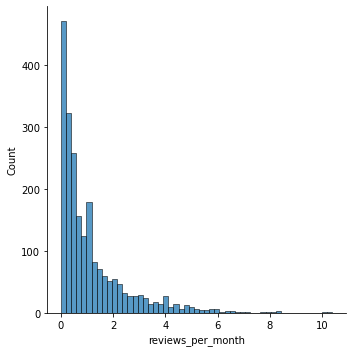

In [10]:
sns.displot(df_train, x="reviews_per_month")

Based on our distribution plot, it seems like the "reviews_per_month" is right-skewed, so we only can use the median to impute the missing values.

In [11]:
df_train['reviews_per_month'] = df_train['reviews_per_month'].fillna(df_train['reviews_per_month'].median())
print(df_train.isnull().sum())

id                     0
region                 0
latitude               0
longitude              0
accommodation_type     0
cost                   0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
owner_id               0
owned_hotels           0
yearly_availability    0
dtype: int64


In [12]:
def convert(df_train, new_column, old_column):
    df_train[new_column] = df_train[old_column].apply(lambda x: 'No' if x == 0 else 'Yes')
    return df_train[new_column].value_counts()

convert(df_train, "Target", "yearly_availability")

No     1439
Yes    1431
Name: Target, dtype: int64

1. Add one column as "target", which is our target variable

2. And convert the 1 as "Yes", 0 as "No"

In [13]:
df_train.head()

id     region  latitude  longitude accommodation_type  cost  \
0  13232  Manhattan  40.71854  -74.00439    Entire home/apt   170   
1    246   Brooklyn  40.64446  -73.95030    Entire home/apt    65   
2  19091     Queens  40.78573  -73.81062       Private room    85   
3  34305  Manhattan  40.73863  -73.98002       Private room   210   
4    444  Manhattan  40.82426  -73.94630        Shared room    75   

   minimum_nights  number_of_reviews  reviews_per_month   owner_id  \
0               5                  7               0.56     929983   
1               3                238               2.30     281764   
2               1                  0               0.65   19923341   
3              30                  0               0.65  200380610   
4               3                 38               0.42     745069   

   owned_hotels  yearly_availability Target  
0             1                    0     No  
1             1                    0     No  
2             1                    1    Yes  
3            65                    1    Yes  
4             3                    1    Yes

### Statistical Analysis & Data Visualization

Analysis Two Parts:

1. Numerical
2. Categorical

[Overview Statistical Analysis](https://www.itl.nist.gov/div898/handbook/eda/section3/eda33e6.htm#:~:text=For%20skewed%20distributions%2C%20it%20is,is%20on%20the%20left%20side "click on"):

1. Mean: mean is the average of the data
2. Mode: mode is the most frequency number fo the data
3. Median: median is the middle of the set of numbers
4. Right Skewed: distribution is one in which the tail is on the right side
5. Left Skewed: distribution is one in which the tail is on the left side
6. Outliers: An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.


[What is Correlation:](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/ "click on")

--- Correlation is any statistical relationship, whether causal or not, between random variables or bivariate data

1. Positive Correlation: both variables change in the same direction.

2. Neutral Correlation: No relationship in the change of the variables.

3. Negative Correlation: variables change in opposite directions.

In [14]:
df_train.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
Target                  object
dtype: object

Numercial

1. Latitude

2. Longitude

3. Cost

4. Minimum nights

5. Number of Reviews

6. Reviews Per Month

7. Owned Hotels


We will analyze the "Room id" & "Owner id" later, at first assumes these two data are unique, but we can try to find any relationship between them


Categorical

1. Region

2. Accommodation Type

3. Yearly Availability

4. Owner ID

#### View Basic Statistical Analysis in each column

In [15]:
df_train.describe()

id     latitude    longitude         cost  minimum_nights  \
count   2870.000000  2870.000000  2870.000000  2870.000000     2870.000000   
mean   26760.657143    40.731224   -73.950158   195.943206       11.530314   
std    14140.930062     0.054942     0.049745   406.184714       37.972339   
min        0.000000    40.507080   -74.242850    10.000000        1.000000   
25%    15931.750000    40.692462   -73.984003    75.000000        1.000000   
50%    28946.500000    40.728250   -73.956720   120.000000        3.000000   
75%    38478.500000    40.762658   -73.934202   200.000000        6.000000   
max    48893.000000    40.898730   -73.721730  9999.000000      999.000000   

       number_of_reviews  reviews_per_month      owner_id  owned_hotels  \
count        2870.000000        2870.000000  2.870000e+03   2870.000000   
mean           16.315331           1.037965  7.202195e+07      8.411498   
std            32.481722           1.204104  8.076516e+07     27.105522   
min             0.000000           0.010000  2.787000e+03      1.000000   
25%             1.000000           0.352500  7.388002e+06      1.000000   
50%             4.000000           0.650000  3.352708e+07      1.000000   
75%            16.000000           1.130000  1.207625e+08      3.000000   
max           395.000000          10.370000  2.738123e+08    327.000000   

       yearly_availability  
count          2870.000000  
mean              0.498606  
std               0.500085  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000

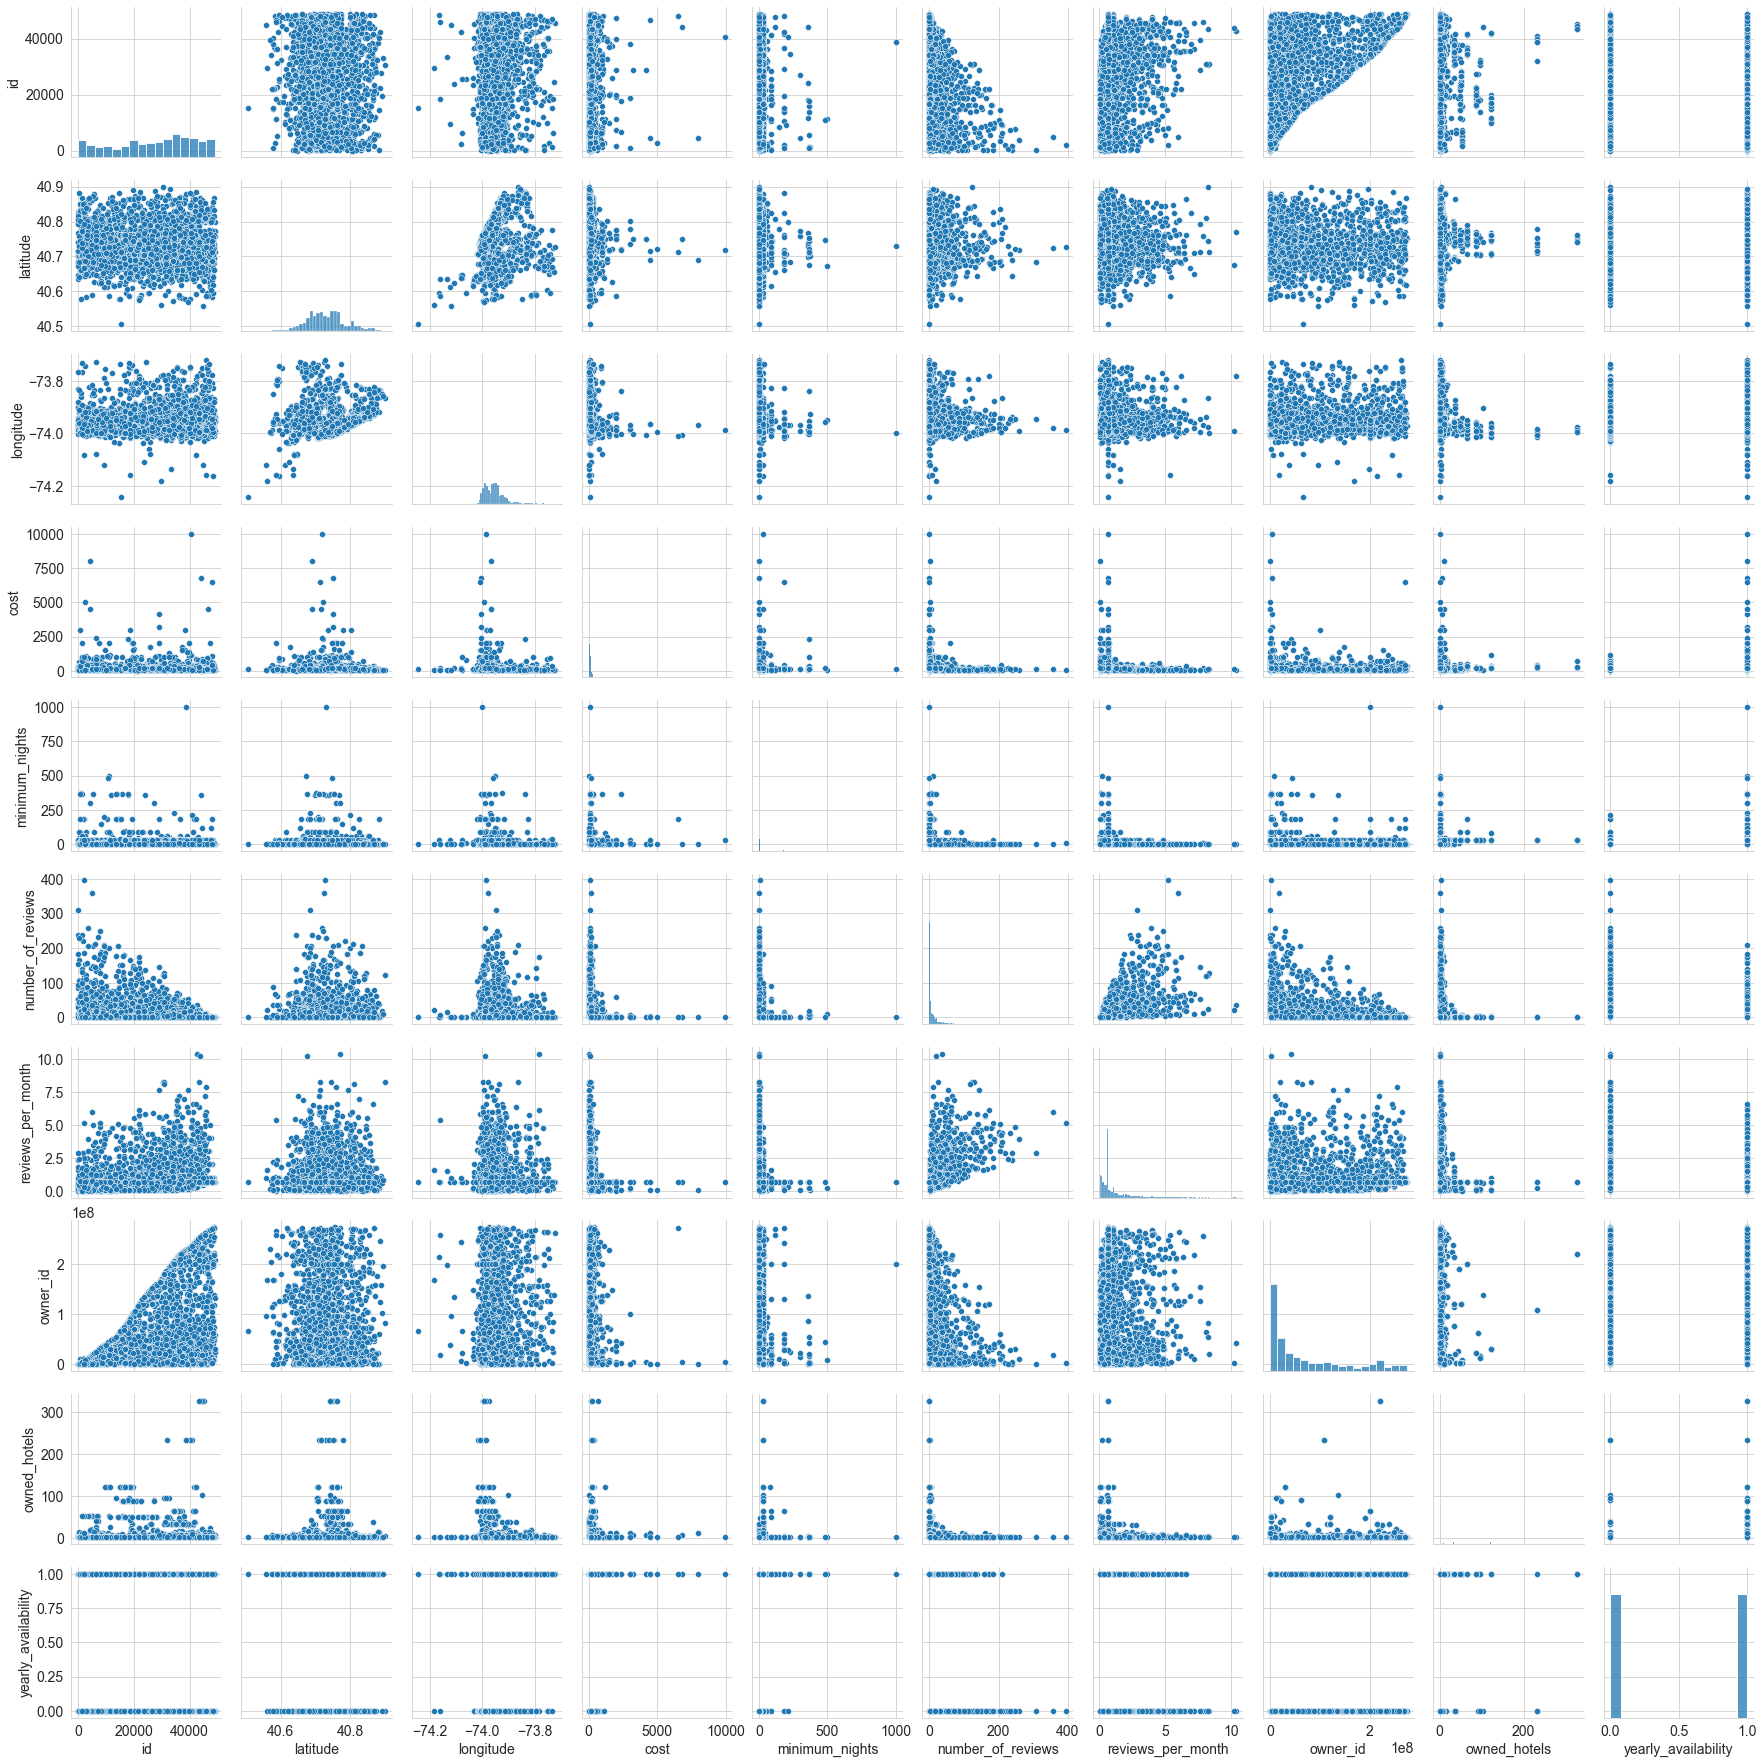

In [16]:
plt.rc("font", size = 14)
sns.set_style('whitegrid')
sns.pairplot(df_train)

Overview Data visualization:
 
1. Latitude vs. Longitude: there is a positive relationship between Latitude and Longitude, so we can do further data visualization.
    
2. Number of Reviews vs Reviews per Month: there is a positive relationship between Number of Reviews and Reviews per Months
    
3. We cannot compare or analyze these two variables ("id" & "owner id") because they are unique, they are not the numerical data

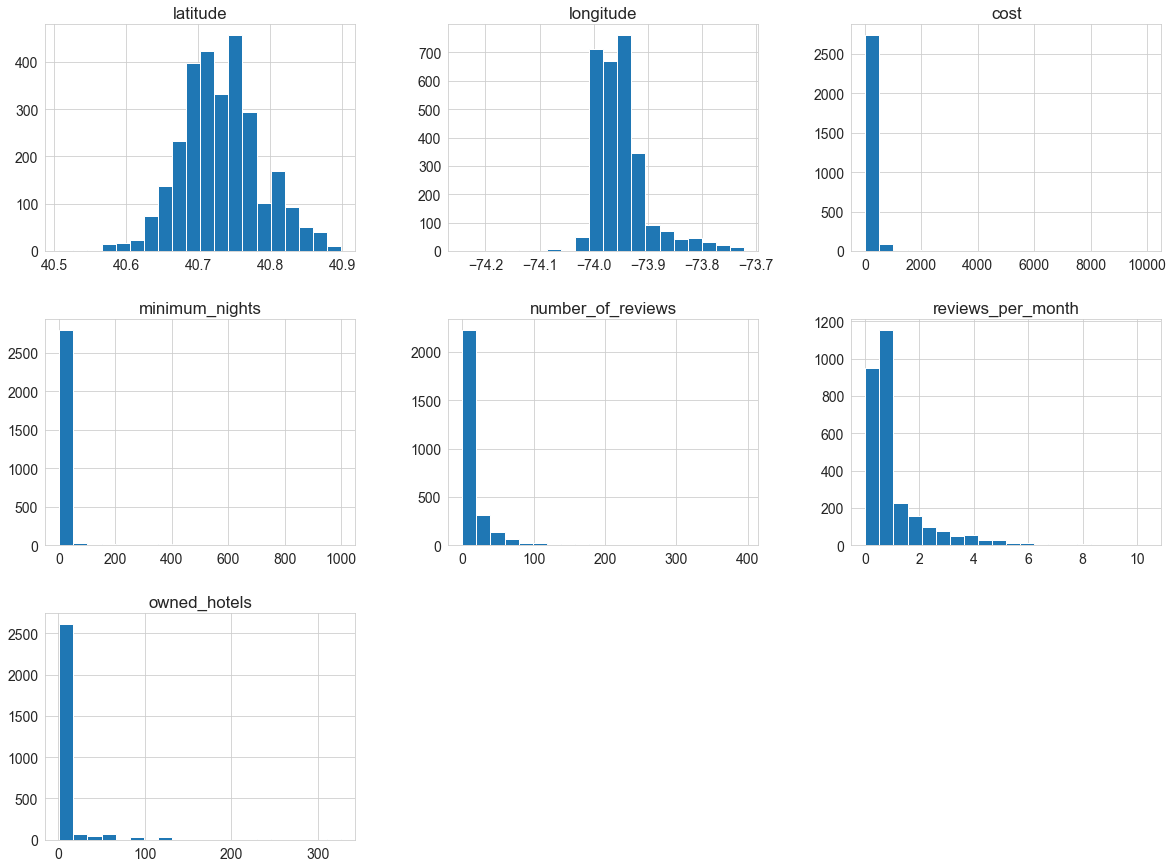

In [17]:
df_train[['latitude', 'longitude', 'cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
          'owned_hotels']].hist(bins=20, figsize=(20,15))

plt.show()

Data Visualization (Histogram):
    
1. Latitude:
    
    Based on the histogram, it seems like the "Latitude" is normal distribution, which means the mean, mode, and median are equals, but we need to use some other statistical analysis to prove whether it is a normal distribution


2. Longitude:

    Based on the histogram, it seems like the "Longitude" is right skewed, which is the mode is less than median, which is less than the mean, but we need to use some other statistical analysis to prove whether it is right skewed.
    
    
3. Cost:

    Based on the histgoram, it seems like the "Cost" is right skewed, which is mode is less than median, which is less than the mean.
    
    
4. Minimum Nights:

    Based on the histogram, it seems like the "Minimum Nights" is right skewed, which is mode is less than median, which is less than the mean.
    
    
5. Number of Reviews:

    Based on the histogram, it seems like the "Number of Reviews" is right skewed, which is mode is less than median, which is less than the mean.
    
    
6. Reviews per Month:

    Based on the histogram, it seems like "Reviews per month" is right skewed, which is mode is less than median, which is less than the mean.
    
    
7. Owned Hotels:

    Based on the histogram, it seems like "Owned Hotels" is right skewed, which is mode is lees than median, which is less than the mean.
    
   

### Numerical Variables

#### Latitude & Longitude

Latitude

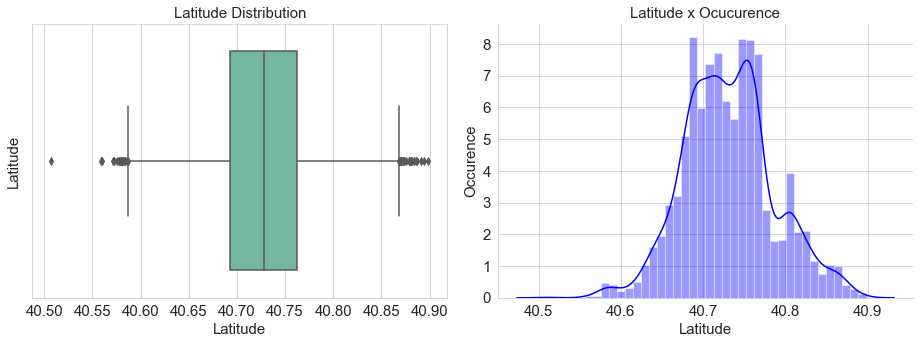

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'latitude', data = df_train, orient = 'v', palette="Set2", ax = ax1)
ax1.set_xlabel('Latitude', fontsize = 15)
ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_title('Latitude Distribution', fontsize = 15)
ax1.tick_params(labelsize = 15)

sns.distplot(df_train['latitude'], ax = ax2, color="b")
sns.despine(ax = ax2)
ax2.set_xlabel('Latitude', fontsize = 15)
ax2.set_ylabel('Occurence', fontsize = 15)
ax2.set_title('Latitude x Ocucurence', fontsize = 15)
ax2.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout() 

1. Box-plot: there are several outliers between 40.50 and 40.60, also between 40.85 and 40.90

2. Distribution plot: It seems like normal distribution

In [19]:
## Quartiles

print('1th Quartile: ', round(df_train['latitude'].quantile(q = 0.25),2))
print('2and Quartile (Median): ', round(df_train['latitude'].quantile(q = 0.50),2))
print('3th Quartile: ', round(df_train['latitude'].quantile(q = 0.75),2))
print('4th Quartile: ', round(df_train['latitude'].quantile(q = 1.00),2))
print('Mean: ', round(df_train['latitude'].mean(), 2))
print('Mode: ', round(df_train['latitude'].mode(), 2))

# Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Latitude above: ', round(df_train['latitude'].quantile(q = 0.75) + 
                      1.5*(df_train['latitude'].quantile(q = 0.75) - df_train['latitude'].quantile(q = 0.25)),2), 'are outliers')

1th Quartile:  40.69
2and Quartile (Median):  40.73
3th Quartile:  40.76
4th Quartile:  40.9
Mean:  40.73
Mode:  0     40.68
1     40.69
2     40.69
3     40.69
4     40.71
5     40.72
6     40.73
7     40.73
8     40.74
9     40.76
10    40.76
11    40.76
12    40.76
13    40.77
dtype: float64
Latitude above:  40.87 are outliers


In [20]:
print('Numerber of outliers: ', df_train[df_train['latitude'] > 40.87]['latitude'].count())
print('Number of Room: ', len(df_train))

## Outliers in %

print('Outliers are:', round(df_train[df_train['latitude'] > 40.87]['latitude'].count()*100/len(df_train),2), '%')

Numerber of outliers:  20
Number of Room:  2870
Outliers are: 0.7 %


1. The Mode, Median, and Mean are the equals, which means the "Latitude" is a normal distribution

2. And there are few outliers, which is 0.7% of outliers in this "Latitude" variable

Longitude

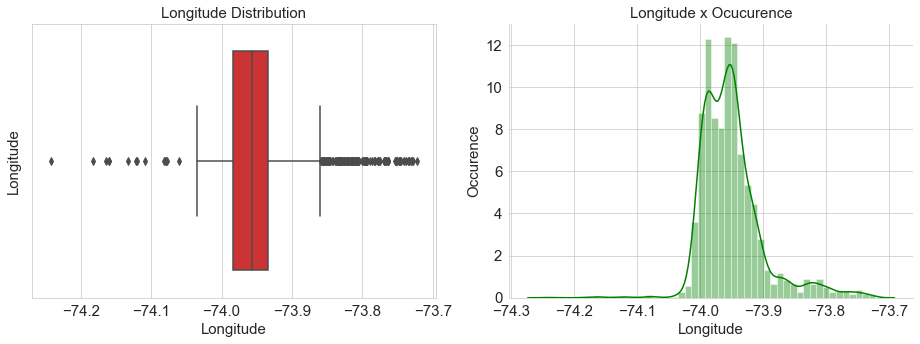

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'longitude', data = df_train, orient = 'v', palette="Set1", ax = ax1)
ax1.set_xlabel('Longitude', fontsize = 15)
ax1.set_ylabel('Longitude', fontsize = 15)
ax1.set_title('Longitude Distribution', fontsize = 15)
ax1.tick_params(labelsize = 15)

sns.distplot(df_train['longitude'], ax = ax2, color="g")
sns.despine(ax = ax2)
ax2.set_xlabel('Longitude', fontsize = 15)
ax2.set_ylabel('Occurence', fontsize = 15)
ax2.set_title('Longitude x Ocucurence', fontsize = 15)
ax2.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout() 

1. Box-plot: there are several outliers between -74.4 and -74.1, also between -73.85 and -73.7

2. Distribution plot: It seems like a little bit right-skewed, so we can do further statistical analysis

In [22]:
## Quartiles

print('1th Quartile: ', round(df_train['longitude'].quantile(q = 0.25),2))
print('2and Quartile (Median): ', round(df_train['longitude'].quantile(q = 0.50),2))
print('3th Quartile: ', round(df_train['longitude'].quantile(q = 0.75),2))
print('4th Quartile: ', round(df_train['longitude'].quantile(q = 1.00),2))
print('Mean: ', round(df_train['longitude'].mean(), 2))
print('Mode: ', round(df_train['longitude'].mode(), 2))

# Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Longitude above: ', round(df_train['longitude'].quantile(q = 0.75) + 
                      1.5*(df_train['longitude'].quantile(q = 0.75) - df_train['longitude'].quantile(q = 0.25)),2), 'are outliers')

1th Quartile:  -73.98
2and Quartile (Median):  -73.96
3th Quartile:  -73.93
4th Quartile:  -73.72
Mean:  -73.95
Mode:  0   -74.00
1   -73.99
2   -73.96
3   -73.96
4   -73.95
dtype: float64
Longitude above:  -73.86 are outliers


In [23]:
print('Numerber of outliers: ', df_train[df_train['longitude'] > -73.86]['longitude'].count())
print('Number of Room: ', len(df_train))

## Outliers in %

print('Outliers are:', round(df_train[df_train['longitude'] > -73.86]['longitude'].count()*100/len(df_train),2), '%')

Numerber of outliers:  168
Number of Room:  2870
Outliers are: 5.85 %


1. The Mode, Median, and Mean are almost equals, which means the "Longitude" is a normal distribution

2. And there are few outliers, which is 5.85% of outliers in this "Longitude" variable

Latitude & Longitude (Visualization)

In [24]:
import plotly.express as px

fig = px.scatter_geo(df_train,lat='latitude',lon='longitude', hover_name="id")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

The map shows that all the rooms are basically located in East Coast United States.

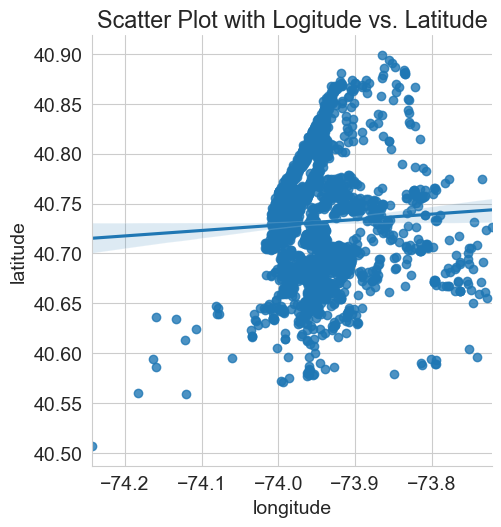

In [25]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='longitude', y='latitude', data = df_train)
plt.title("Scatter Plot with Logitude vs. Latitude");

In [26]:
correlation = df_train.corr()
print('Correlation between Longitude and Latitude', round(correlation.loc['longitude', 'latitude'],2))

Correlation between Longitude and Latitude 0.05


Based on the Longitude vs. Latitude scatterplot, there is a moderately correlated relationship between them.

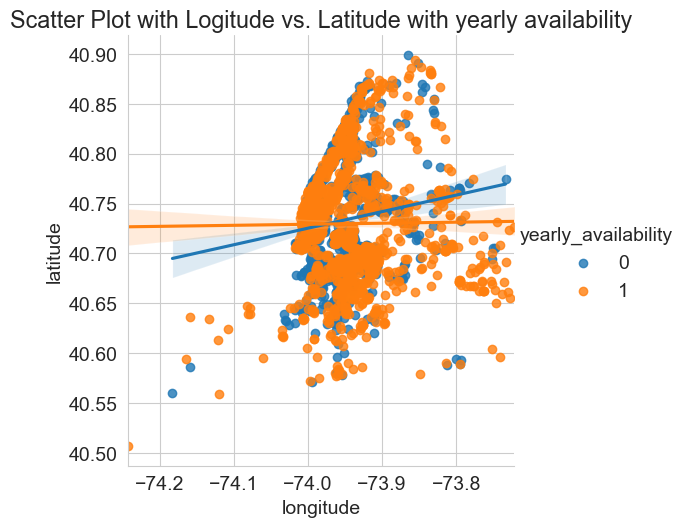

In [27]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='longitude', y='latitude', hue = 'yearly_availability', data = df_train)
plt.title("Scatter Plot with Logitude vs. Latitude with yearly availability");

Based on the Longitude vs. Latitude with yearly availability, it seems that the with no yearly availability ("0") has a stronger correlation relationship than with yearly availability ("1")

#### Costs

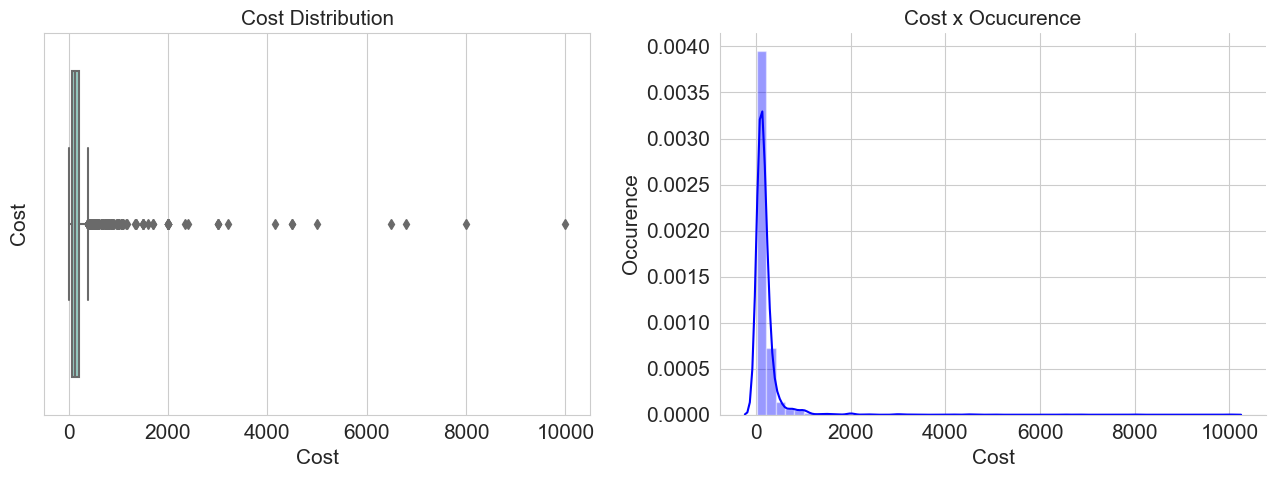

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'cost', data = df_train, orient = 'v', palette="Set3", ax = ax1)
ax1.set_xlabel('Cost', fontsize = 15)
ax1.set_ylabel('Cost', fontsize = 15)
ax1.set_title('Cost Distribution', fontsize = 15)
ax1.tick_params(labelsize = 15)

sns.distplot(df_train['cost'], ax = ax2, color="b")
sns.despine(ax = ax2)
ax2.set_xlabel('Cost', fontsize = 15)
ax2.set_ylabel('Occurence', fontsize = 15)
ax2.set_title('Cost x Ocucurence', fontsize = 15)
ax2.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout() 

1. Box-plot: there are several outliers between 500 and 10,000

2. Distribution plot: It seems like it is a right-skewed, so we can do further statistical analysis

In [29]:
## Quartiles

print('1th Quartile: ', round(df_train['cost'].quantile(q = 0.25),2))
print('2and Quartile (Median): ', round(df_train['cost'].quantile(q = 0.50),2))
print('3th Quartile: ', round(df_train['cost'].quantile(q = 0.75),2))
print('4th Quartile: ', round(df_train['cost'].quantile(q = 1.00),2))
print('Mean: ', round(df_train['cost'].mean(), 2))
print('Mode: ', round(df_train['cost'].mode(), 2))

# Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Cost above: ', round(df_train['cost'].quantile(q = 0.75) + 
                      1.5*(df_train['cost'].quantile(q = 0.75) - df_train['cost'].quantile(q = 0.25)),2), 'are outliers')

1th Quartile:  75.0
2and Quartile (Median):  120.0
3th Quartile:  200.0
4th Quartile:  9999.0
Mean:  195.94
Mode:  0    100
dtype: int64
Cost above:  387.5 are outliers


In [30]:
print('Numerber of outliers: ', df_train[df_train['cost'] > 387.5]['cost'].count())
print('Number of Room: ', len(df_train))

## Outliers in %

print('Outliers are:', round(df_train[df_train['cost'] > 387.5]['cost'].count()*100/len(df_train),2), '%')

Numerber of outliers:  216
Number of Room:  2870
Outliers are: 7.53 %


1. The Mean is larger than Median, which indicates is right-skewed in "Cost" variable

2. And there are few outliers, which is 7.85% of outliers in this "Cost" variable

#### Minimum Nights

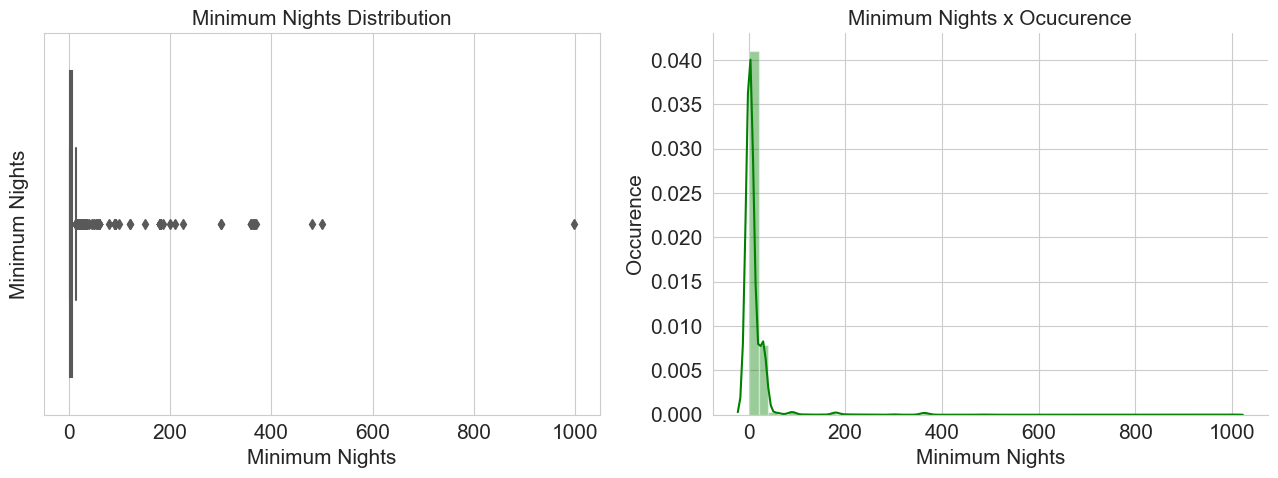

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'minimum_nights', data = df_train, orient = 'v', palette="Set2", ax = ax1)
ax1.set_xlabel('Minimum Nights', fontsize = 15)
ax1.set_ylabel('Minimum Nights', fontsize = 15)
ax1.set_title('Minimum Nights Distribution', fontsize = 15)
ax1.tick_params(labelsize = 15)

sns.distplot(df_train['minimum_nights'], ax = ax2, color="g")
sns.despine(ax = ax2)
ax2.set_xlabel('Minimum Nights', fontsize = 15)
ax2.set_ylabel('Occurence', fontsize = 15)
ax2.set_title('Minimum Nights x Ocucurence', fontsize = 15)
ax2.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout() 


1. Box-plot: there are several outliers between 0 and 1,000 in "Minimum Nights" variable

2. Distribution plot: It seems like it is a right-skewed, so we can do further statistical analysis in "Minimum Nights" variable

In [32]:
## Quartiles

print('1th Quartile: ', round(df_train['minimum_nights'].quantile(q = 0.25),2))
print('2and Quartile (Median): ', round(df_train['minimum_nights'].quantile(q = 0.50),2))
print('3th Quartile: ', round(df_train['minimum_nights'].quantile(q = 0.75),2))
print('4th Quartile: ', round(df_train['minimum_nights'].quantile(q = 1.00),2))
print('Mean: ', round(df_train['minimum_nights'].mean(), 2))
print('Mode: ', round(df_train['minimum_nights'].mode(), 2))

# Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Minimum Nights above: ', round(df_train['minimum_nights'].quantile(q = 0.75) + 
                      1.5*(df_train['minimum_nights'].quantile(q = 0.75) - df_train['minimum_nights'].quantile(q = 0.25)),2), 'are outliers')

1th Quartile:  1.0
2and Quartile (Median):  3.0
3th Quartile:  6.0
4th Quartile:  999.0
Mean:  11.53
Mode:  0    1
dtype: int64
Minimum Nights above:  13.5 are outliers


In [33]:
print('Numerber of outliers: ', df_train[df_train['minimum_nights'] > 13.5]['minimum_nights'].count())
print('Number of Room: ', len(df_train))

## Outliers in %

print('Outliers are:', round(df_train[df_train['minimum_nights'] > 13.5]['minimum_nights'].count()*100/len(df_train),2), '%')

Numerber of outliers:  558
Number of Room:  2870
Outliers are: 19.44 %


1. The Mean is larger than Median, which indicates is right-skewed in "Minimum nights" variable
2. And there are few outliers, which is 19.44% of outliers in this "Minimum nights" variable

#### Number of Reviews & Reviews Per Month

Number of Reviews

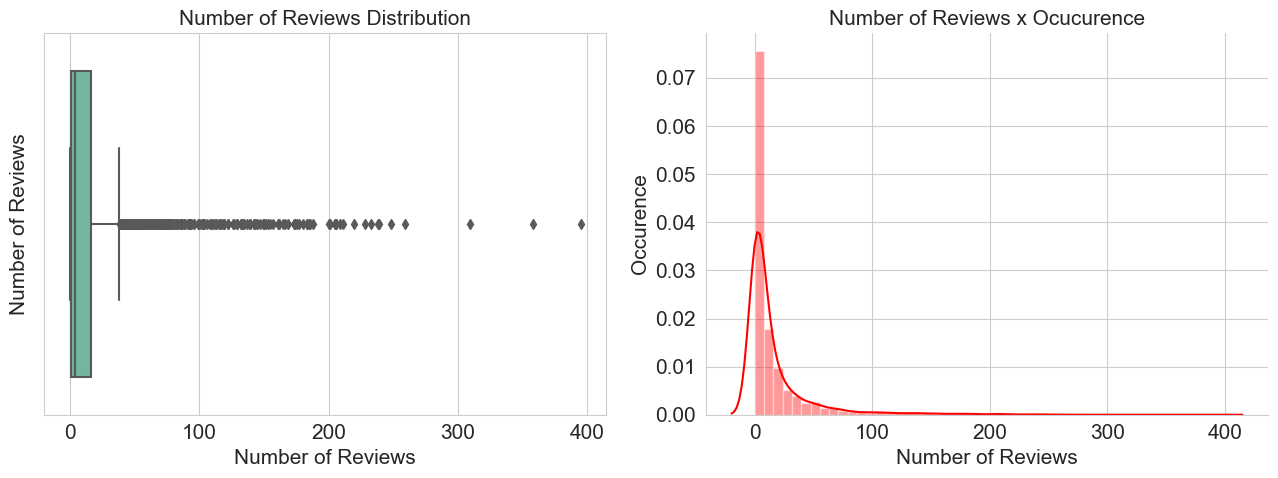

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'number_of_reviews', data = df_train, orient = 'v', palette="Set2", ax = ax1)
ax1.set_xlabel('Number of Reviews', fontsize = 15)
ax1.set_ylabel('Number of Reviews', fontsize = 15)
ax1.set_title('Number of Reviews Distribution', fontsize = 15)
ax1.tick_params(labelsize = 15)

sns.distplot(df_train['number_of_reviews'], ax = ax2, color="r")
sns.despine(ax = ax2)
ax2.set_xlabel('Number of Reviews', fontsize = 15)
ax2.set_ylabel('Occurence', fontsize = 15)
ax2.set_title('Number of Reviews x Ocucurence', fontsize = 15)
ax2.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout() 

1. Box-plot: there are several outliers between 30 and 400 in "Number of Reviews" variable

2. Distribution plot: It seems like it is a right-skewed, so we can do further statistical analysis in "Number of Reviews" variable

In [35]:
## Quartiles

print('1th Quartile: ', round(df_train['number_of_reviews'].quantile(q = 0.25),2))
print('2and Quartile (Median): ', round(df_train['number_of_reviews'].quantile(q = 0.50),2))
print('3th Quartile: ', round(df_train['number_of_reviews'].quantile(q = 0.75),2))
print('4th Quartile: ', round(df_train['number_of_reviews'].quantile(q = 1.00),2))
print('Mean: ', round(df_train['number_of_reviews'].mean(), 2))
print('Mode: ', round(df_train['number_of_reviews'].mode(), 2))

# Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Number of Reviews above: ', round(df_train['number_of_reviews'].quantile(q = 0.75) + 
                      1.5*(df_train['number_of_reviews'].quantile(q = 0.75) - df_train['number_of_reviews'].quantile(q = 0.25)),2), 'are outliers')

1th Quartile:  1.0
2and Quartile (Median):  4.0
3th Quartile:  16.0
4th Quartile:  395.0
Mean:  16.32
Mode:  0    0
dtype: int64
Number of Reviews above:  38.5 are outliers


In [36]:
print('Numerber of outliers: ', df_train[df_train['number_of_reviews'] > 38.5]['number_of_reviews'].count())
print('Number of Room: ', len(df_train))

## Outliers in %

print('Outliers are:', round(df_train[df_train['number_of_reviews'] > 38.5]['number_of_reviews'].count()*100/len(df_train),2), '%')

Numerber of outliers:  332
Number of Room:  2870
Outliers are: 11.57 %


1. The Mean is larger than Median, which indicates is right-skewed in "Number of Reviews" variable
2. And there are few outliers, which is 11.57% of outliers in this "Number of Reviews" variable

#### Reviews Per Months

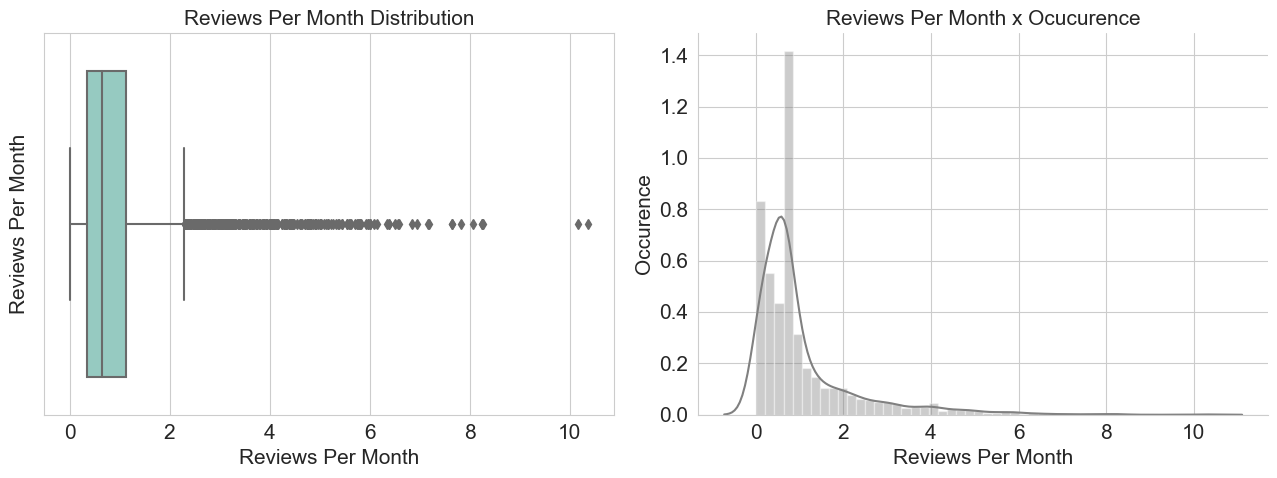

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'reviews_per_month', data = df_train, orient = 'v', palette="Set3", ax = ax1)
ax1.set_xlabel('Reviews Per Month', fontsize = 15)
ax1.set_ylabel('Reviews Per Month', fontsize = 15)
ax1.set_title('Reviews Per Month Distribution', fontsize = 15)
ax1.tick_params(labelsize = 15)

sns.distplot(df_train['reviews_per_month'], ax = ax2, color="gray")
sns.despine(ax = ax2)
ax2.set_xlabel('Reviews Per Month', fontsize = 15)
ax2.set_ylabel('Occurence', fontsize = 15)
ax2.set_title('Reviews Per Month x Ocucurence', fontsize = 15)
ax2.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout() 

1. Box-plot: there are several outliers between 2.2 and 12 in "Reviews Per Month" variable

2. Distribution plot: It seems like it is a right-skewed, so we can do further statistical analysis in "Reviews Per Month" variable

In [38]:
## Quartiles

print('1th Quartile: ', round(df_train['reviews_per_month'].quantile(q = 0.25),2))
print('2and Quartile (Median): ', round(df_train['reviews_per_month'].quantile(q = 0.50),2))
print('3th Quartile: ', round(df_train['reviews_per_month'].quantile(q = 0.75),2))
print('4th Quartile: ', round(df_train['reviews_per_month'].quantile(q = 1.00),2))
print('Mean: ', round(df_train['reviews_per_month'].mean(), 2))
print('Mode: ', round(df_train['reviews_per_month'].mode(), 2))

# Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Reviews Per Month above: ', round(df_train['reviews_per_month'].quantile(q = 0.75) + 
                      1.5*(df_train['reviews_per_month'].quantile(q = 0.75) - df_train['reviews_per_month'].quantile(q = 0.25)),2), 'are outliers')

1th Quartile:  0.35
2and Quartile (Median):  0.65
3th Quartile:  1.13
4th Quartile:  10.37
Mean:  1.04
Mode:  0    0.65
dtype: float64
Reviews Per Month above:  2.3 are outliers


In [39]:
print('Numerber of outliers: ', df_train[df_train['reviews_per_month'] > 2.3]['reviews_per_month'].count())
print('Number of Room: ', len(df_train))

## Outliers in %

print('Outliers are:', round(df_train[df_train['reviews_per_month'] > 2.3]['reviews_per_month'].count()*100/len(df_train),2), '%')

Numerber of outliers:  328
Number of Room:  2870
Outliers are: 11.43 %


1. The Mean is larger than Median, which indicates is right-skewed in "Review Per Month" variable
2. And there are few outliers, which is 11.43% of outliers in this "Reviews Per Month" variable

Number of Reviews & Reviews Per Month (Visualization)

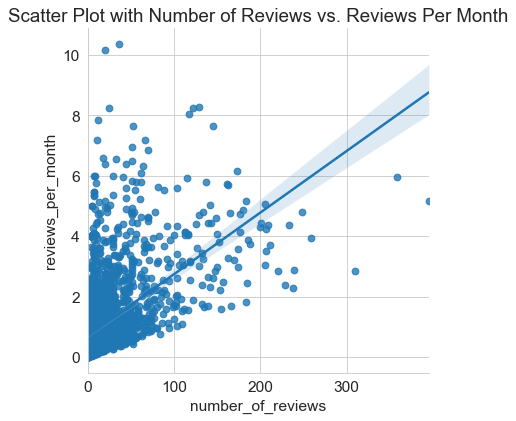

In [40]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':80})
sns.lmplot(x ='number_of_reviews', y ='reviews_per_month', data = df_train)
plt.title("Scatter Plot with Number of Reviews vs. Reviews Per Month");

In [41]:
correlation = df_train.corr()
print('Correlation between Number of Reviews and Reviews Per Month', round(correlation.loc['number_of_reviews', 'reviews_per_month'],2))

Correlation between Number of Reviews and Reviews Per Month 0.55


Based on the Number of Reviews vs. Reviews Per Month scatterplot, there is a moderately correlated relationship between them.

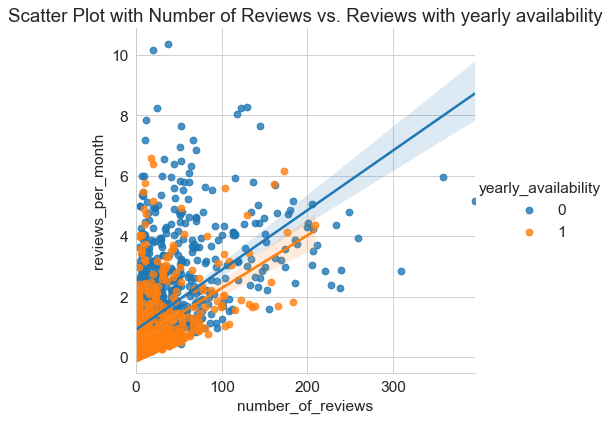

In [42]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':80})
sns.lmplot(x ='number_of_reviews', y ='reviews_per_month', hue = 'yearly_availability', data = df_train)
plt.title("Scatter Plot with Number of Reviews vs. Reviews with yearly availability");

Based on the Number of Reviews vs. Reviews Per Month with yearly availability, it seems that with no yearly availability ("0") has a stronger correlation relationship than with yearly availability ("1")

#### Owned Hotels

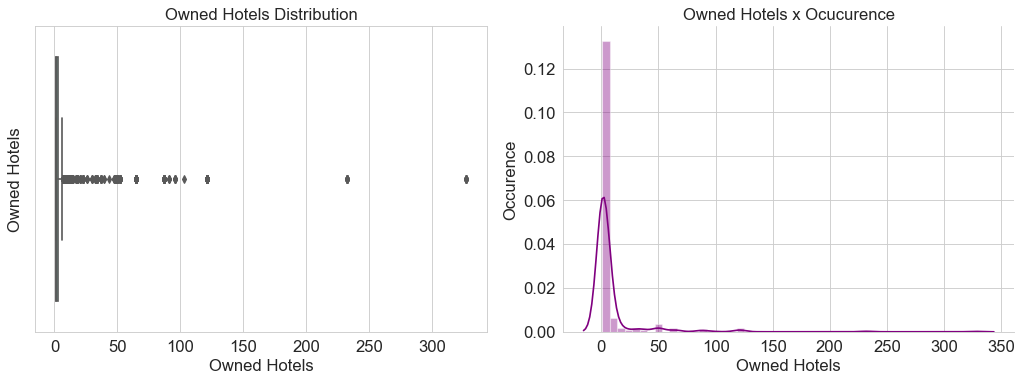

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'owned_hotels', data = df_train, orient = 'v', palette="Set2", ax = ax1)
ax1.set_xlabel('Owned Hotels', fontsize = 15)
ax1.set_ylabel('Owned Hotels', fontsize = 15)
ax1.set_title('Owned Hotels Distribution', fontsize = 15)
ax1.tick_params(labelsize = 15)

sns.distplot(df_train['owned_hotels'], ax = ax2, color="purple")
sns.despine(ax = ax2)
ax2.set_xlabel('Owned Hotels', fontsize = 15)
ax2.set_ylabel('Occurence', fontsize = 15)
ax2.set_title('Owned Hotels x Ocucurence', fontsize = 15)
ax2.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout() 

1. Box-plot: there are several outliers between 1 and 350 in "Owned Hotels" variable

2. Distribution plot: It seems like it is a right-skewed, so we can do further statistical analysis in "Owned Hotels" variable

In [44]:
## Quartiles

print('1th Quartile: ', round(df_train['owned_hotels'].quantile(q = 0.25),2))
print('2and Quartile (Median): ', round(df_train['owned_hotels'].quantile(q = 0.50),2))
print('3th Quartile: ', round(df_train['owned_hotels'].quantile(q = 0.75),2))
print('4th Quartile: ', round(df_train['owned_hotels'].quantile(q = 1.00),2))
print('Mean: ', round(df_train['owned_hotels'].mean(), 2))
print('Mode: ', round(df_train['owned_hotels'].mode(), 2))

# Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Owned Hotels above: ', round(df_train['owned_hotels'].quantile(q = 0.75) + 
                      1.5*(df_train['owned_hotels'].quantile(q = 0.75) - df_train['owned_hotels'].quantile(q = 0.25)),2), 'are outliers')

1th Quartile:  1.0
2and Quartile (Median):  1.0
3th Quartile:  3.0
4th Quartile:  327.0
Mean:  8.41
Mode:  0    1
dtype: int64
Owned Hotels above:  6.0 are outliers


In [45]:
print('Numerber of outliers: ', df_train[df_train['owned_hotels'] > 6.0]['owned_hotels'].count())
print('Number of Room: ', len(df_train))

## Outliers in %

print('Outliers are:', round(df_train[df_train['owned_hotels'] > 2.3]['owned_hotels'].count()*100/len(df_train),2), '%')

Numerber of outliers:  430
Number of Room:  2870
Outliers are: 28.64 %


1. The Mean is larger than Median, which indicates is right-skewed in "Owned Hotels" variable
2. And there are few outliers, which is 28.64% of outliers in this "Owned Hotels" variable

### Categorical Variables

1. Region

2. Accommodation Type

3. Yearly Availability

4. Owner Id

In [46]:
df_train.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
Target                  object
dtype: object

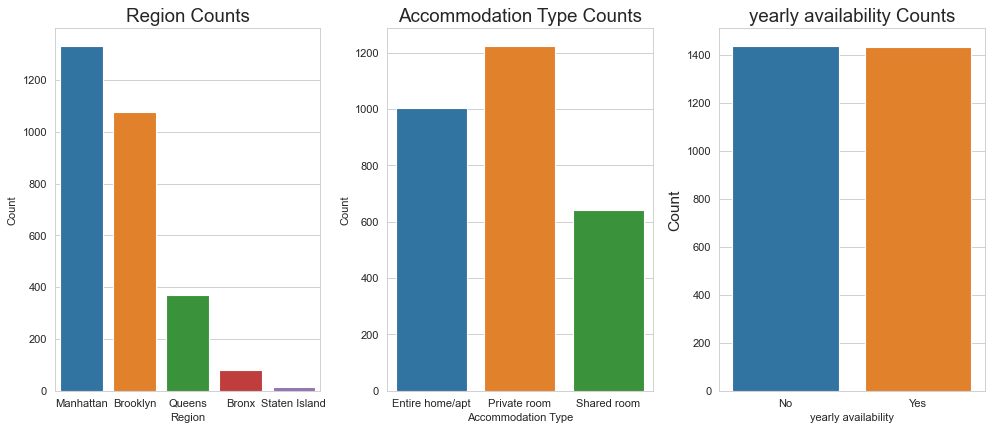

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df_train['region'], ax = ax1)
ax1.set_xlabel('Region', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Region Counts')
ax1.tick_params(labelsize = 10)

sns.countplot(df_train['accommodation_type'], ax = ax2)
ax2.set_xlabel('Accommodation Type', fontsize = 10)
ax2.set_ylabel('Count', fontsize = 10)
ax2.set_title('Accommodation Type Counts')
ax2.tick_params(labelsize = 10)

sns.countplot(df_train['Target'], ax = ax3)
ax3.set_xlabel('yearly availability', fontsize = 10)
ax3.set_ylabel('Count')
ax3.set_title('yearly availability Counts')
ax3.tick_params(labelsize = 10)


plt.subplots_adjust(wspace=0.25)

#### Region

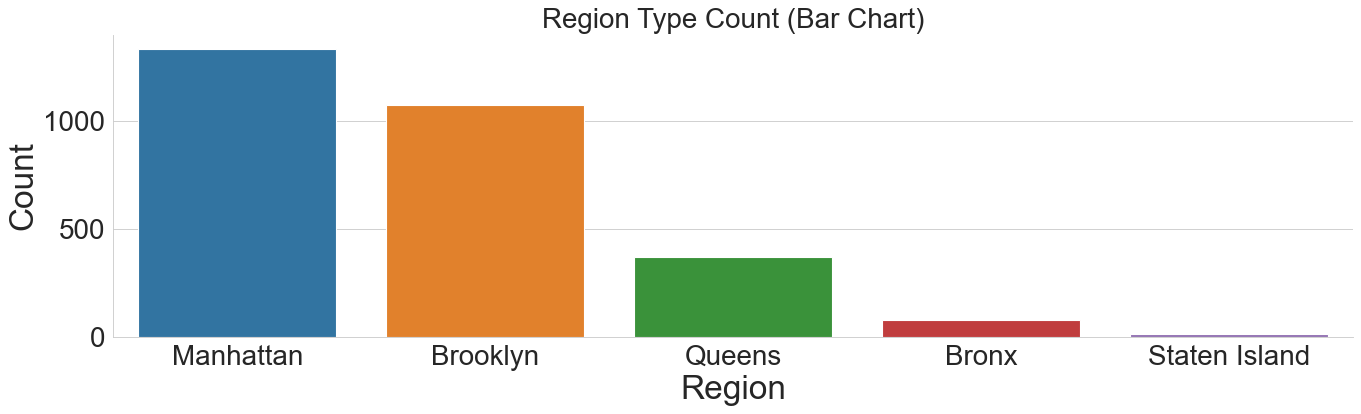

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'region', data = df_train)
ax.set_xlabel('Region', fontsize = 30)
ax.set_ylabel('Count', fontsize = 30)
ax.set_title('Region Type Count (Bar Chart)', fontsize = 25)
ax.tick_params(labelsize = 25)
sns.despine()

<AxesSubplot:title={'center':'Region Count (Pie Chart)'}, ylabel='region'>

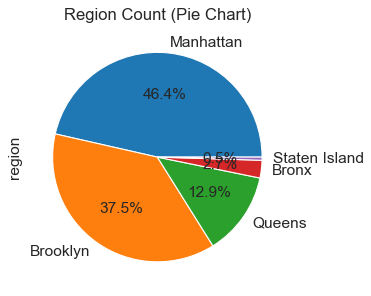

In [49]:
plt.figure(figsize = (20, 15))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Region Count (Pie Chart)", fontsize = 15)

df_train["region"].value_counts().plot.pie(autopct = "%1.1f%%")

1. "Manhattan" is the largest proportion (46.4%) in region categorical variables

2. "Staten Island" is the smallest proportion (0.5%) in region categorical variables

#### Aggregation the "region" & "yearly availability"

In [50]:
df_train.groupby(["region", "yearly_availability"]).size().reset_index(name = "count")

region  yearly_availability  count
0          Bronx                    0     21
1          Bronx                    1     57
2       Brooklyn                    0    594
3       Brooklyn                    1    481
4      Manhattan                    0    682
5      Manhattan                    1    651
6         Queens                    0    140
7         Queens                    1    230
8  Staten Island                    0      2
9  Staten Island                    1     12

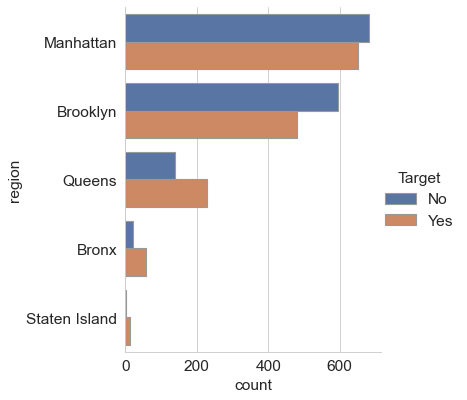

In [51]:
sns.catplot(y = "region", hue ="Target", kind = "count", palette ="deep", edgecolor =".6", data = df_train)

1. Both "Manhattan" and "Brooklyn" regions without "yearly availability" is larger than with "yearly availability"

2. "Queens", "Bronx", and "Staten Island" regions with "yearly availability" is larger than without "yearly availability"

#### Yearly Availability Rate by Region (Transformation)

In [52]:
count_region_target_pct = pd.crosstab(df_train['Target'],df_train['region']).apply(lambda x: x/x.sum() * 100)
count_region_target_pct = count_region_target_pct.transpose()

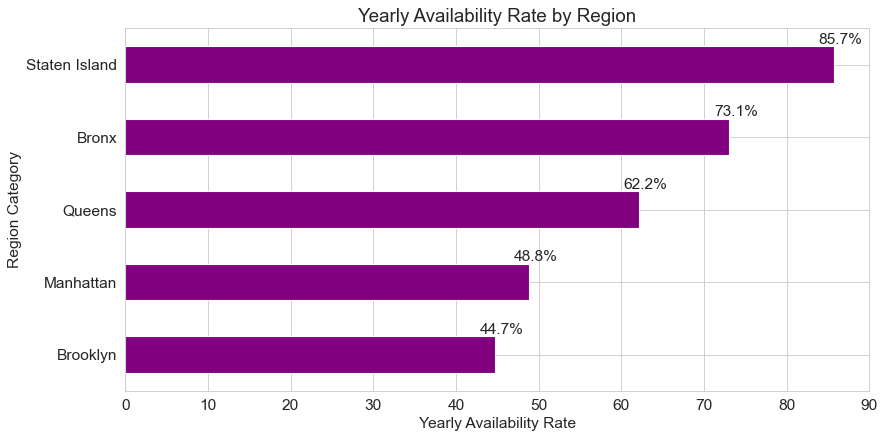

In [53]:
plot_job = count_region_target_pct['Yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           color = {"purple"},
                                                                           figsize = (12,6))
                                                                               
plt.title('Yearly Availability Rate by Region')
plt.xlabel('Yearly Availability Rate')
plt.ylabel('Region Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_region_target_pct['Yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width() + 0.8, 
                  rec.get_y() + 0.5 + rec.get_height() - 0.5, 
                  label +'%', 
                  ha = 'center', 
                  va = 'bottom')

Based on the horizontal bar chart, the "Staten Island" and "Bronx" are higher "yearly availability" rates to compare other region categories

#### Accommodation Type

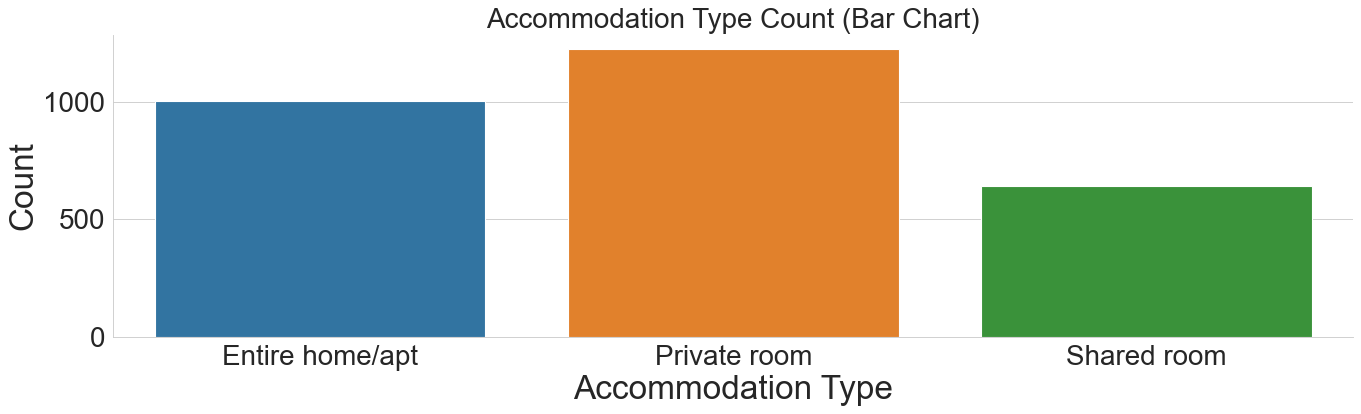

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'accommodation_type', data = df_train)
ax.set_xlabel('Accommodation Type', fontsize = 30)
ax.set_ylabel('Count', fontsize = 30)
ax.set_title('Accommodation Type Count (Bar Chart)', fontsize = 25)
ax.tick_params(labelsize = 25)
sns.despine()

<AxesSubplot:title={'center':'Accommodation Type (Pie Chart)'}, ylabel='accommodation_type'>

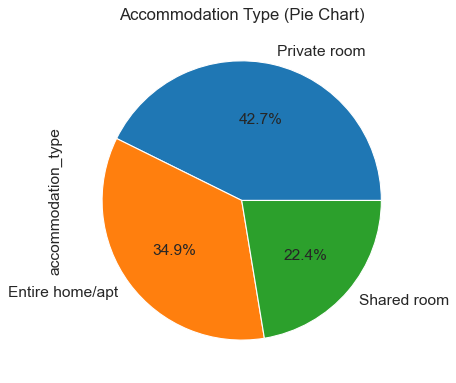

In [55]:
plt.figure(figsize = (20, 15))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 1.2, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Accommodation Type (Pie Chart)", fontsize = 15)

df_train["accommodation_type"].value_counts().plot.pie(autopct = "%1.1f%%")

1. "Private Room" is the largest proportion (42.7%) in accommodation type categorical variables

2. "Shared Room" is the smallest proportion (0.5%) in accommodation type categorical variables

#### Aggregation the "accommodation type" & "yearly availability"

In [56]:
df_train.groupby(["accommodation_type", "yearly_availability"]).size().reset_index(name = "count")

accommodation_type  yearly_availability  count
0    Entire home/apt                    0    944
1    Entire home/apt                    1     58
2       Private room                    0    124
3       Private room                    1   1101
4        Shared room                    0    371
5        Shared room                    1    272

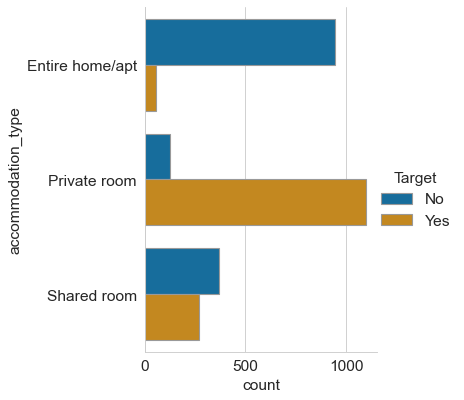

In [57]:
sns.catplot(y="accommodation_type", hue="Target", kind="count",
            palette ="colorblind", edgecolor=".6",
            data = df_train)

1. Both "Entire home/apt" and "Shared room" accommodation types without "yearly availability" is larger than with "yearly availability"

2. "Private room" accommodation type with "yearly availability" is larger than without "yearly availability"

#### Yearly Availability Rate by Accommodation Type (Transformation)

In [58]:
count_accomm_target_pct = pd.crosstab(df_train['Target'],df_train['accommodation_type']).apply(lambda x: x/x.sum() * 100)
count_accomm_target_pct = count_accomm_target_pct.transpose()

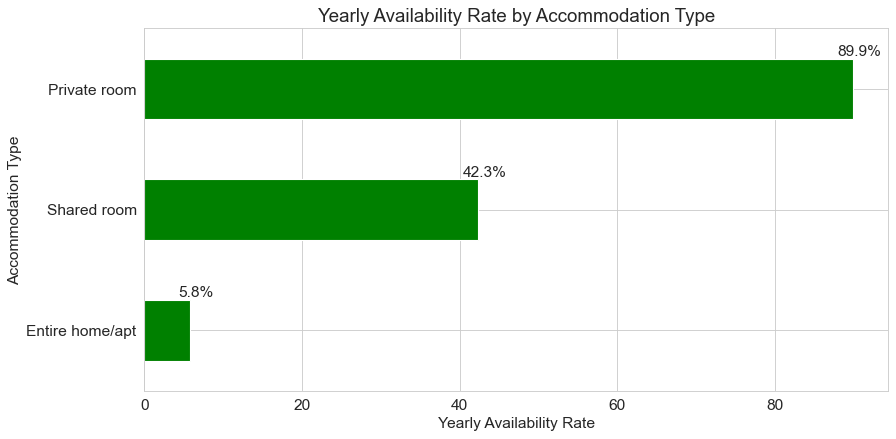

In [59]:
plot_job = count_accomm_target_pct['Yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           color = {"green"},
                                                                           figsize = (12,6))
                                                                               
plt.title('Yearly Availability Rate by Accommodation Type')
plt.xlabel('Yearly Availability Rate')
plt.ylabel('Accommodation Type')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_accomm_target_pct['Yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width() + 0.8, 
                  rec.get_y() + 0.5 + rec.get_height() - 0.5, 
                  label +'%', 
                  ha = 'center', 
                  va = 'bottom')

Based on the horizontal bar chart, the "Private room" has the highest "yearly availability" rates to compare other accommodation types

#### Yearly Availability

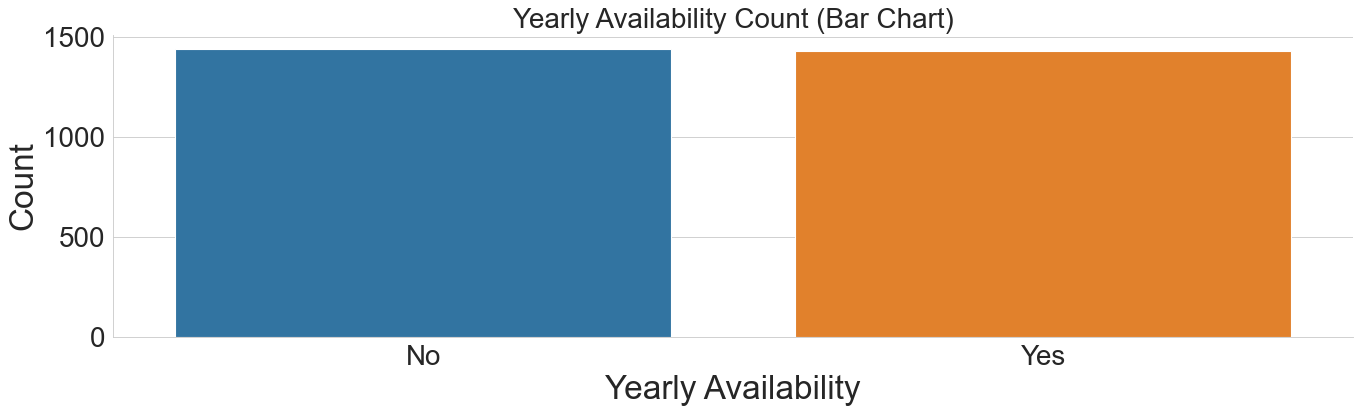

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'Target', data = df_train)
ax.set_xlabel('Yearly Availability', fontsize = 30)
ax.set_ylabel('Count', fontsize = 30)
ax.set_title('Yearly Availability Count (Bar Chart)', fontsize = 25)
ax.tick_params(labelsize = 25)
sns.despine()

<AxesSubplot:title={'center':'Yearly Availability (Pie Chart)'}, ylabel='Target'>

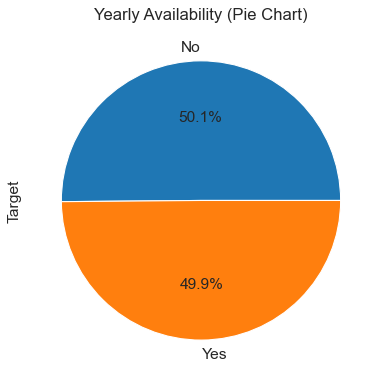

In [61]:
plt.figure(figsize = (20, 15))

plt.subplots_adjust(left = 0, bottom = 0.5, right = 1.2, top = 0.9, wspace = 0.5, hspace = 0.8)

plt.subplot(141)

plt.title("Yearly Availability (Pie Chart)", fontsize = 15)

df_train["Target"].value_counts().plot.pie(autopct = "%1.1f%%")

Both yearly availability variable type proportions are almost the same

In [62]:
df_train.owner_id.value_counts()

30283594     31
200380610    29
2856748      25
120762452    22
22541573     20
             ..
538008        1
914838        1
216299753     1
138349238     1
21216008      1
Name: owner_id, Length: 2371, dtype: int64

### Encoding the Categorical Variables (Transformation)

[Encoding Categorical Variables](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/ "click on")

1. Why needs to encode the categorical variables

    -- Since most machine learning models only accept numerical variables, preprocessing categorical variables becomes a necessary step. Therefore, we need to convert these categorical variables into numbers so that the model can understand and extract valuable information


2. Ordinal Data: 

    --- The categories have an inherent order


3. Nominal Data:

    --- The categories do not have an inherent order


4. [OrdinalEncoder Transform:](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/#:~:text=An%20ordinal%20encoding%20involves%20mapping,harnessed%20when%20preparing%20the%20data. "click on")

    --- Involves mapping each unique label to an integer value

    --- Only really suitable when there is a known relationship between the categories. Some variables in our dataset do have this relationship, and ideally this relationship should be exploited when preparing the data.

    --- Use the OrdinalEncoder from scikit-learn to encode each variable to integer


5. [OneHotEncoder Transform](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/#:~:text=An%20ordinal%20encoding%20involves%20mapping,harnessed%20when%20preparing%20the%20data. "click on")

    --- It is is appropriate for categorical data where no relationship exists between categories

    --- Use scikit-learn library provides the OneHotEncoder class to automatically one hot encode one or more variables.

    --- Use the One-Hot encoder for categorical features with more than two different types of values. In this case, it may be necessary to use a One-hot encoder, also known as dummy encoding. You can also use the get_dummies method from the Pandas package.


6. [LabelEncoder Transform](https://vitalflux.com/when-use-labelencoder-python-example/#:~:text=Use%20LabelEncoder%20when%20there%20are,values%20including%20male%20or%20female. "click on")

    --- When a categorical feature has only two possible values. For example, features with a value of "yes" or "no". Or maybe a gender trait when there are only two possible values (including male or female).

    --- Do not use LabelEncoder when categorical features have more than two values.


7. [Deal with multiple Categorical Variables](https://www.analyticsvidhya.com/blog/2021/05/how-to-perform-one-hot-encoding-for-multi-categorical-variables/)

    --- The technique is that we restrict the one-hot encoding to the 10 most frequent labels of the variable
    
    --- This means that we will create a binary variable for each of the 10 most common labels, which is equivalent to grouping all other labels under a new category, which will be removed in this case.
    
    --- 10 new dummy variables indicating the presence or absence of one of the 10 most common labels are 1 and then 0 for a particular observation.


[More concepts between Ordinal Encoding and One-Hot-Encoding](https://stackoverflow.com/questions/69052776/ordinal-encoding-or-one-hot-encoding "click on")

In [63]:
df_train.select_dtypes(include='O').keys()

Index(['region', 'accommodation_type', 'Target'], dtype='object')

In our data set case, the "region" & "accommodation_type" are categorical variables

#### Count each region categories

In [64]:
cat_region = df_train.groupby("region").size().reset_index(name = "count")

cat_region = pd.DataFrame(cat_region)

In [65]:
cat_region

region  count
0          Bronx     78
1       Brooklyn   1075
2      Manhattan   1333
3         Queens    370
4  Staten Island     14

In "Region" category case, we will use one-hot encoding because categorical features having more than two different types of value. Moreover, the features are nominal(do not have any order)

#### One-Hot Encoding

In [66]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [67]:
encoder_df = pd.DataFrame(encoder.fit_transform(df_train[['region']]).toarray())
df_train = df_train.join(encoder_df)

In [68]:
df_train = df_train.drop(columns=['region'])

In [69]:
df_train.head()

id  latitude  longitude accommodation_type  cost  minimum_nights  \
0  13232  40.71854  -74.00439    Entire home/apt   170               5   
1    246  40.64446  -73.95030    Entire home/apt    65               3   
2  19091  40.78573  -73.81062       Private room    85               1   
3  34305  40.73863  -73.98002       Private room   210              30   
4    444  40.82426  -73.94630        Shared room    75               3   

   number_of_reviews  reviews_per_month   owner_id  owned_hotels  \
0                  7               0.56     929983             1   
1                238               2.30     281764             1   
2                  0               0.65   19923341             1   
3                  0               0.65  200380610            65   
4                 38               0.42     745069             3   

   yearly_availability Target    0    1    2    3    4  
0                    0     No  0.0  0.0  1.0  0.0  0.0  
1                    0     No  0.0  1.0  0.0  0.0  0.0  
2                    1    Yes  0.0  0.0  0.0  1.0  0.0  
3                    1    Yes  0.0  0.0  1.0  0.0  0.0  
4                    1    Yes  0.0  0.0  1.0  0.0  0.0

In [70]:
df_train = df_train.rename(columns = {0: 'Bronx', 1: 'Brooklyn', 2: 'Manhattan', 3: 'Queens', 4: 'Staten Island'})

In [71]:
df_train.head()

id  latitude  longitude accommodation_type  cost  minimum_nights  \
0  13232  40.71854  -74.00439    Entire home/apt   170               5   
1    246  40.64446  -73.95030    Entire home/apt    65               3   
2  19091  40.78573  -73.81062       Private room    85               1   
3  34305  40.73863  -73.98002       Private room   210              30   
4    444  40.82426  -73.94630        Shared room    75               3   

   number_of_reviews  reviews_per_month   owner_id  owned_hotels  \
0                  7               0.56     929983             1   
1                238               2.30     281764             1   
2                  0               0.65   19923341             1   
3                  0               0.65  200380610            65   
4                 38               0.42     745069             3   

   yearly_availability Target  Bronx  Brooklyn  Manhattan  Queens  \
0                    0     No    0.0       0.0        1.0     0.0   
1                    0     No    0.0       1.0        0.0     0.0   
2                    1    Yes    0.0       0.0        0.0     1.0   
3                    1    Yes    0.0       0.0        1.0     0.0   
4                    1    Yes    0.0       0.0        1.0     0.0   

   Staten Island  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

#### Count each accommadtion type

In [72]:
cat_accomm = df_train.groupby("accommodation_type").size().reset_index(name = "count")
cat_accomm = pd.DataFrame(cat_accomm)

In [73]:
cat_accomm

accommodation_type  count
0    Entire home/apt   1002
1       Private room   1225
2        Shared room    643

In the "Accommodation type" category case, this type category is "Ordinal Variables". In other words, there is a known relationship between the categories (Level), such as Entire home/apt, Private room, and Shared room. Thus, we will use OrdinalEncoder Transform.

#### Ordinal Encoder

In [74]:
accomm_1 = {'Entire home/apt':1, 'Private room': 2, 'Shared room': 3}

In [75]:
df_train['accommodation_type'] = df_train.accommodation_type.map(accomm_1)

In [76]:
df_train.head()

id  latitude  longitude  accommodation_type  cost  minimum_nights  \
0  13232  40.71854  -74.00439                   1   170               5   
1    246  40.64446  -73.95030                   1    65               3   
2  19091  40.78573  -73.81062                   2    85               1   
3  34305  40.73863  -73.98002                   2   210              30   
4    444  40.82426  -73.94630                   3    75               3   

   number_of_reviews  reviews_per_month   owner_id  owned_hotels  \
0                  7               0.56     929983             1   
1                238               2.30     281764             1   
2                  0               0.65   19923341             1   
3                  0               0.65  200380610            65   
4                 38               0.42     745069             3   

   yearly_availability Target  Bronx  Brooklyn  Manhattan  Queens  \
0                    0     No    0.0       0.0        1.0     0.0   
1                    0     No    0.0       1.0        0.0     0.0   
2                    1    Yes    0.0       0.0        0.0     1.0   
3                    1    Yes    0.0       0.0        1.0     0.0   
4                    1    Yes    0.0       0.0        1.0     0.0   

   Staten Island  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

Drop the "id" & "owner id":

1. Because they are unique columns, which means they are not very helpful to build our machine learning model

2. Based on the previous data visualization scatter plot, we noticed that these two columns do not have any relationship with other columns, so we believe that they were not useful to building the machine learning model

In [77]:
final_df = df_train.drop(columns=['id', 'owner_id', 'Target'])

final_df.head()

latitude  longitude  accommodation_type  cost  minimum_nights  \
0  40.71854  -74.00439                   1   170               5   
1  40.64446  -73.95030                   1    65               3   
2  40.78573  -73.81062                   2    85               1   
3  40.73863  -73.98002                   2   210              30   
4  40.82426  -73.94630                   3    75               3   

   number_of_reviews  reviews_per_month  owned_hotels  yearly_availability  \
0                  7               0.56             1                    0   
1                238               2.30             1                    0   
2                  0               0.65             1                    1   
3                  0               0.65            65                    1   
4                 38               0.42             3                    1   

   Bronx  Brooklyn  Manhattan  Queens  Staten Island  
0    0.0       0.0        1.0     0.0            0.0  
1    0.0       1.0        0.0     0.0            0.0  
2    0.0       0.0        0.0     1.0            0.0  
3    0.0       0.0        1.0     0.0            0.0  
4    0.0       0.0        1.0     0.0            0.0

In [78]:
final_df.shape

(2870, 14)

# Supervised Machine Learning

[Supervised Machine Learning:](https://www.ibm.com/cloud/learn/supervised-learning "click on")

1. It is defined by using labeled datasets to train algorithms to classify data or accurately predict outcomes.
2. As input data is fed into the model, it adjusts its weights until the model gets a proper fit as part of the cross-validation process.

[How does supervised learning works:](https://www.ibm.com/cloud/learn/supervised-learning "click on")

1. It uses the training set to teach the model to produce the desired output.
2. The training dataset includes both the input and the correct output, which allows the model to learn over time.

[Classification & Regression:](https://www.ibm.com/cloud/learn/supervised-learning "click on")

1. Classification uses an algorithm to accurately assign test data into specific categories. It identifies specific entities in the dataset and tries to draw some conclusions about how to label or define those entities.
--- Example: linear classifiers, support vector machines (SVM), decision trees, k-nearest neighbor, and random forest

2. Regression: for understanding the relationship between dependent and independent variables
--- Example: Linear regression, logistical regression, and polynomial regression

In our data set, it is labeled dataset, so we can only use Supervised Machine Learning to build the model and make the predictons

# Choosing a model

We will use below popular supervised machine model to build the model and to choose the best model.

Regression:

1. Logistics Regression

Classification:

1. Support Vector Machine Classification
2. Decision Tree Classification
3. Random Forest Classification
4. XGBoost Classification
5. Gradient Boosting Classification
6. K-nearest neighbors classifier (KNN)
7. Gaussian Naive Bayes

In [79]:
final_df.head()

latitude  longitude  accommodation_type  cost  minimum_nights  \
0  40.71854  -74.00439                   1   170               5   
1  40.64446  -73.95030                   1    65               3   
2  40.78573  -73.81062                   2    85               1   
3  40.73863  -73.98002                   2   210              30   
4  40.82426  -73.94630                   3    75               3   

   number_of_reviews  reviews_per_month  owned_hotels  yearly_availability  \
0                  7               0.56             1                    0   
1                238               2.30             1                    0   
2                  0               0.65             1                    1   
3                  0               0.65            65                    1   
4                 38               0.42             3                    1   

   Bronx  Brooklyn  Manhattan  Queens  Staten Island  
0    0.0       0.0        1.0     0.0            0.0  
1    0.0       1.0        0.0     0.0            0.0  
2    0.0       0.0        0.0     1.0            0.0  
3    0.0       0.0        1.0     0.0            0.0  
4    0.0       0.0        1.0     0.0            0.0

### Target variable: yearly availability

In [80]:
target = final_df['yearly_availability']
target.head()

0    0
1    0
2    1
3    1
4    1
Name: yearly_availability, dtype: int64

### Independent Variables: besides the "yearly availability"

In [81]:
final_df_new = final_df.drop(columns=['yearly_availability'])

final_df_new.head()

latitude  longitude  accommodation_type  cost  minimum_nights  \
0  40.71854  -74.00439                   1   170               5   
1  40.64446  -73.95030                   1    65               3   
2  40.78573  -73.81062                   2    85               1   
3  40.73863  -73.98002                   2   210              30   
4  40.82426  -73.94630                   3    75               3   

   number_of_reviews  reviews_per_month  owned_hotels  Bronx  Brooklyn  \
0                  7               0.56             1    0.0       0.0   
1                238               2.30             1    0.0       1.0   
2                  0               0.65             1    0.0       0.0   
3                  0               0.65            65    0.0       0.0   
4                 38               0.42             3    0.0       0.0   

   Manhattan  Queens  Staten Island  
0        1.0     0.0            0.0  
1        0.0     0.0            0.0  
2        0.0     1.0            0.0  
3        1.0     0.0            0.0  
4        1.0     0.0            0.0

## Variance Inflation Factor (VIF)

[What is Variance Inflation Factor?](https://medium.com/@analyttica/what-is-the-variance-inflation-factor-vif-d1dc12bb9cf5#:~:text=Variance%20Inflation%20Factor%20(VIF)%20is,variables%20are%20not%20linearly%20related. "click on")

1. Used to detect the presence of multicollinearity. The variance inflation factor (VIF) measures how much the variance of the estimated regression coefficients is inflated compared to when the predictors are not linearly related.

[How to identify the right independent variables for Machine Learning Supervised Algorithms?](https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32 "click on")

1. We do not want to over-provision redundant data points, i.e. highly correlated (multicollinear) data and complicate the model without improving prediction accuracy
2. In fact, sometimes over-inputting data can reduce prediction accuracy.
3. Therefore, we need to ensure that the model is not oversimplified and reflects the real complexity
4. Finally, we need to keep VIF less than 10 to avoid multicollinearity

#### Heat Map

[Heatmap Documation](https://seaborn.pydata.org/generated/seaborn.heatmap.html "Click on")

[Heatmap](https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/ "Click on")

1. A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.


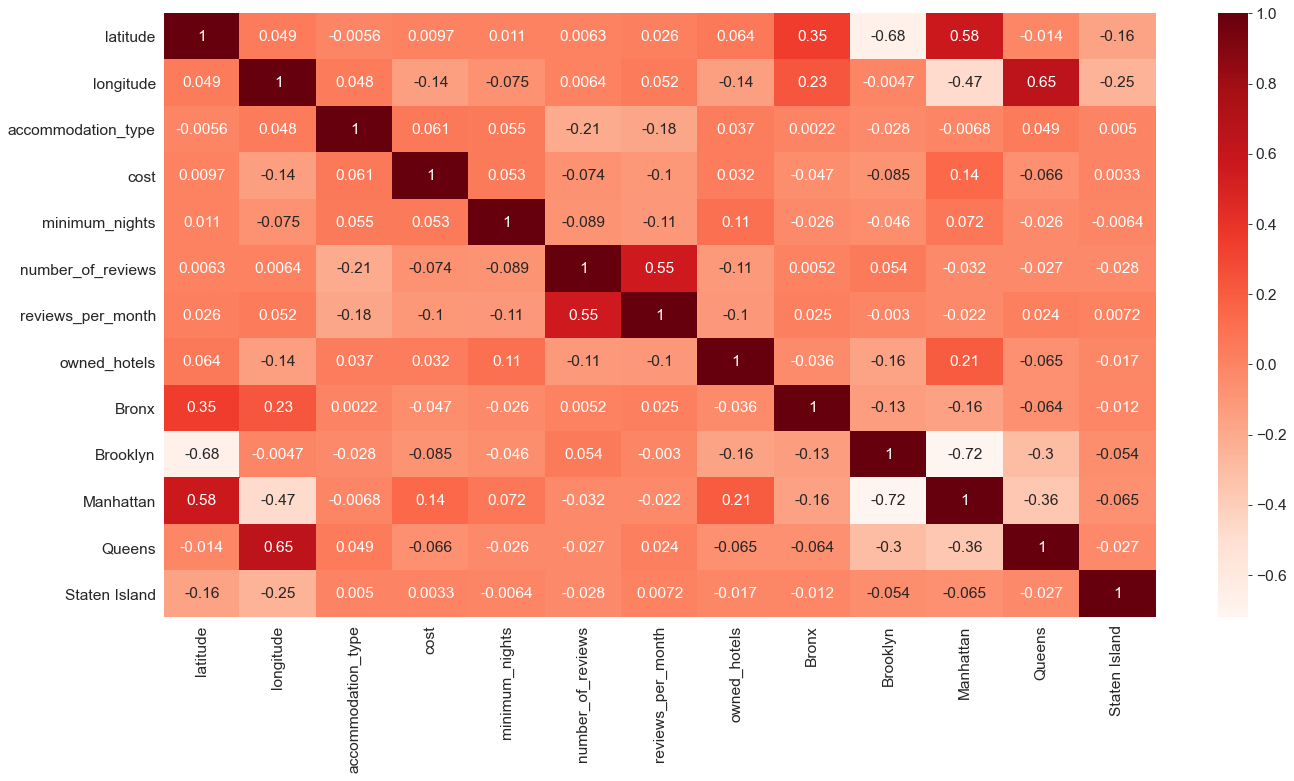

In [82]:
plt.figure(figsize=(20,10))
cor = final_df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

1. As we can see "Queens" & "Longitude" has a strong correlation, which is 0.65.
2. Others are not, which means are around 0.5 or smaller 0.5 correlation.

#### Variance Inflation Factor (VIF)

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = final_df_new
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

              features    vif_Factor
0             latitude  2.729907e+00
1            longitude  2.678736e+00
2   accommodation_type  1.061198e+00
3                 cost  1.046930e+00
4       minimum_nights  1.029698e+00
5    number_of_reviews  1.477023e+00
6    reviews_per_month  1.468820e+00
7         owned_hotels  1.081249e+00
8                Bronx  2.336600e+05
9             Brooklyn  3.218560e+06
10           Manhattan  3.996935e+06
11              Queens  1.106492e+06
12       Staten Island  4.203063e+04


Overall, all the variables VIF are smaller than 10, which is great, then we can build the ML model now

# Training the model

[Traning the model](https://www.w3schools.com/python/python_ml_train_test.asp "click on")

1. Split the the data set into two sets: a training set and a testing set
2. 80% for training, and 20% for testing.
3. Use [sklearn.model_selection](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html "click on") to train the dataset
4. [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html "click on"): Split dataset into k consecutive folds (without shuffling by default).
5. [Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html "click on"): Evaluate a score by cross-validation
6. [Confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html "click on"): Compute confusion matrix to evaluate the accuracy of a classification
7. [Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): Accuracy classification score
8. [Precision Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): Compute the precision
9. [Recall Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): Compute the recall score


K-Fold Cross Validation (CV)

[What is K-Fold Cross Validation:](https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=When%20a%20specific%20value%20for,learning%20model%20on%20unseen%20data. "Click on")

1. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited sample of data.
2. The procedure has a parameter called k which refers to the number of groups into which a given data sample is to be divided. Therefore, the process is often referred to as k-fold cross-validation.
3. Cross-validation is mainly used to apply machine learning to estimate the skill of a machine learning model on unseen data. That is, use a limited number of samples to estimate the general expected performance of the model when used to make predictions on data that was not used during model training.

[Why we use K = 10 in Cross Validation:](https://stats.stackexchange.com/questions/49692/why-do-researchers-use-10-fold-cross-validation-instead-of-testing-on-a-validati "Click on")

1. This is not a problem if the CVs are nested, i.e. all optimization, feature selection and model selection, whether they themselves use CVs or not, are contained in one big CV.
2. While the validation set is usually just a more or less randomly chosen part of the entire data, it is just one iteration of the CV equivalent. For this, it's actually a worse approach, as it's vulnerable to (hopefully) lucky/unfortunate choices or a well-chosen validation set.
3. K-fold cross-validation estimators have lower variance than single holdout set estimators, which can be important if the amount of available data is limited.
4. If you have a single hold out set where 90% of the data is used for training and 10% is used for testing, the test set is very small, so performance estimates will vary widely for different samples, or different partitions of the data form training and test sets. k-fold validation reduces this variance by averaging over k distinct partitions, so performance estimates are less sensitive to the partitioning of the data.

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df_new, target, test_size = 0.2, random_state = 42)

# from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, mean_squared_error
k_fold = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=1) #shuffle = True

In [85]:
X_train.head()

latitude  longitude  accommodation_type  cost  minimum_nights  \
1962  40.57210  -73.99712                   2   290               1   
1839  40.71179  -73.93870                   1    60               1   
655   40.80545  -73.93838                   3    64               1   
610   40.71936  -73.96181                   2   150               1   
2228  40.70127  -73.91764                   1   120               2   

      number_of_reviews  reviews_per_month  owned_hotels  Bronx  Brooklyn  \
1962                  1               0.75             1    0.0       1.0   
1839                 41               4.42             2    0.0       1.0   
655                 103               3.40            10    0.0       0.0   
610                   0               0.65             1    0.0       1.0   
2228                  8               0.31             1    0.0       1.0   

      Manhattan  Queens  Staten Island  
1962        0.0     0.0            0.0  
1839        0.0     0.0            0.0  
655         1.0     0.0            0.0  
610         0.0     0.0            0.0  
2228        0.0     0.0            0.0

In [86]:
X_train.shape

(2296, 13)

In [87]:
X_test.shape

(574, 13)

In [88]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Logistic Regression

[Logistic Regression Overview:](https://realpython.com/logistic-regression-python/ "Click on")

1. It is a fundamental classification technique.
2. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression.
3. Logit: use a linear function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ.
4. sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱)), The function 𝑝(𝐱) is often interpreted as the predicted probability that the output for a given 𝐱 is equal to 1.Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.
5. The best predicted weights 𝑏₀, 𝑏₁, …, 𝑏ᵣ such that the function 𝑝(𝐱) is as close as possible to all actual responses 𝑦ᵢ, 𝑖 = 1, …, 𝑛, where 𝑛 is the number of observations.

[Logistic Regression Pros & Cons:](https://iq.opengenus.org/advantages-and-disadvantages-of-logistic-regression/ "Click on")

Pros:

1. It is one of the simplest machine learning algorithms and is easy to implement but provides good training efficiency in some cases. Also for these reasons, training a model using this algorithm does not require high computational power.
2. Unlike decision trees or support vector machines, this algorithm allows models to be easily updated to reflect new data. The update can be done using stochastic gradient descent.
3. When the dataset has linearly separable features, logistic regression proves to be very effective.

Cons:

1. Nonlinear problems cannot be solved with logistic regression because it has a linear decision surface. Linearly separable data is rarely found in real-world scenarios. Therefore, nonlinear features need to be transformed, which can be done by increasing the number of features, making the data linearly separable in higher dimensions.
2. It is difficult to capture complex relationships using logistic regression. More powerful and complex algorithms such as neural networks can easily outperform this algorithm.
3. Only important and relevant features should be used to build the model, otherwise the probabilistic predictions made by the model may be incorrect and the predicted value of the model may be reduced.

[LogisticRegression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html "click on")
    

In [89]:
from sklearn.linear_model import LogisticRegression

LOG_model = LogisticRegression() 
LOG_model.fit(X_train, y_train)
LOG_pred = LOG_model.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, LOG_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, LOG_pred), 2)*100)
print("Precision: ", round(precision_score(y_test, LOG_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, LOG_pred), 2)*100)
LOG_CV = (cross_val_score(LOG_model, X_train, y_train, cv = k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[207  73]
 [ 88 206]]
	
Accuracy:  72.0
Precision:  74.0
Recall:  70.0


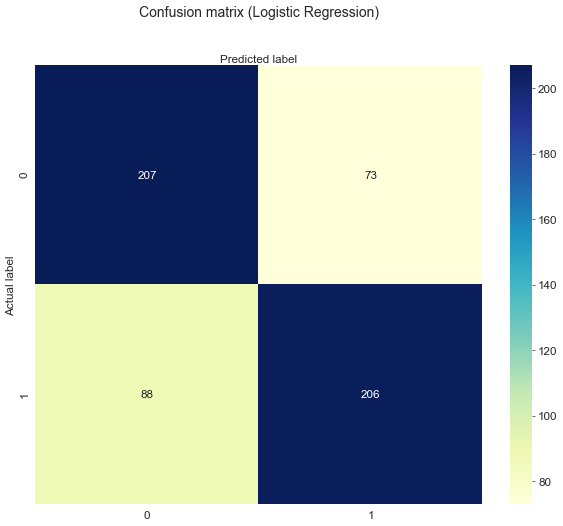

In [90]:
# Visualing the confusion matrix using Heatmap 

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':60})
LOG_cnf_matrix = confusion_matrix(y_test, LOG_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(LOG_cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix (Logistic Regression)", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

## Support Vector Machine Classification

[Support Vector Machine Overview:](https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/?utm_source=blog&utm_medium=understandingsupportvectormachinearticle "click on")

1. It is a supervised machine learning algorithm that can be used for classification or regression challenges
2. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have), and the value of each feature is the value of a specific coordinate

Pros:

1. It works very well with clear separation margins
2. Effective in high-dimensional space.
3. It is valid when the dimension is greater than the number of samples.
4. It uses a subset of training points (called support vectors) in the decision function, so it is also memory efficient.

Cons:

1. It does not perform well when we have large datasets because the required training time is higher
2. It also performs poorly when the dataset has more noise, i.e. the target classes overlap
3. SVMs do not directly provide probability estimates, these are computed using expensive five-fold cross-validation. It is included in the related SVC method of the Python scikit-learn library.

[SVM Documentation](https://scikit-learn.org/stable/modules/svm.html "Click on")
    

In [140]:
from sklearn.svm import SVC

SVM = SVC(kernel = 'sigmoid', probability=True)
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, SVM_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, SVM_pred),2)*100)
print("Precision: ", round(precision_score(y_test, SVM_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, SVM_pred), 2)*100)
SVC_1 = (cross_val_score(SVM, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[180 100]
 [108 186]]
	
Accuracy:  64.0
Precision:  65.0
Recall:  63.0


Text(0.5, 425.7333333333333, 'Predicted label')

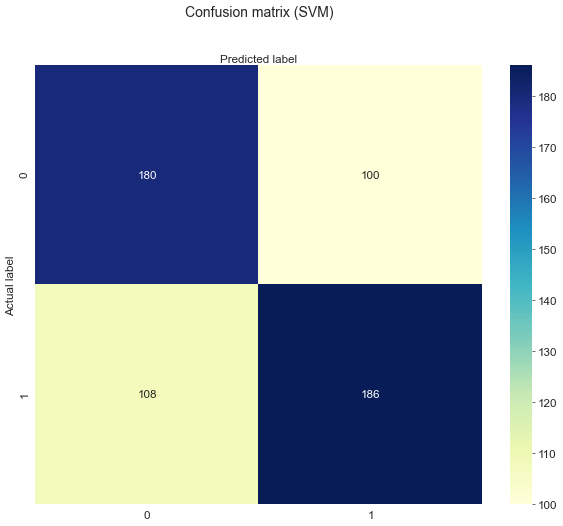

In [141]:
# Visualing the confusion matrix using Heatmap 

SVM_cnf_matrix = confusion_matrix(y_test, SVM_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(SVM_cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix (SVM)", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

## Decision Tree Classification

[Dcision Tree Overview:](https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-decision-tree-classification-using-python/ "Click on")

1. It is used in classification and regression algorithms.
2. A decision tree is like a tree with nodes. Branching depends on many factors. It splits the data into such branches until a threshold is reached. A decision tree consists of a root node, child nodes and leaf nodes.
3. Node: It is the point at which the tree is split based on the value of some attribute/feature of the dataset.
4. Edges: It directs the result of the split to the next node, as we can see in the image above, there are nodes for features such as appearance, humidity, and wind. Each potential value of each of these attributes/features has an advantage.
5. Root: This is the node where the first split occurs.
6. Leaves: These are the terminal nodes that predict the outcome of the decision tree.

[Decision Tree Pros & Cons:](https://dhirajkumarblog.medium.com/top-5-advantages-and-disadvantages-of-decision-tree-algorithm-428ebd199d9a "Click on")

Pros:

1. Compared with other algorithms, decision trees require less data preparation during preprocessing.
2. Missing values in the data also do not greatly affect the process of building the decision tree.
3. Decision trees do not require normalization of data.

Cons:

1. Small changes in data will cause huge changes in the decision tree structure, resulting in instability.
2. For decision trees, sometimes the computation is much more complicated than other algorithms.
3. Decision tree algorithms are not suitable for applying regression and predicting continuous values.

[Decision Tree Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html "Click on")


In [93]:
from sklearn.tree import DecisionTreeClassifier

DTREE= DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
DTREE.fit(X_train, y_train)
DTREE_pred = DTREE.predict(X_test)


print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, DTREE_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, DTREE_pred),2)*100)
print("Precision: ", round(precision_score(y_test, DTREE_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, DTREE_pred), 2)*100)
DTREE_CV = (cross_val_score(DTREE, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[242  38]
 [ 38 256]]
	
Accuracy:  87.0
Precision:  87.0
Recall:  87.0


Text(0.5, 425.7333333333333, 'Predicted label')

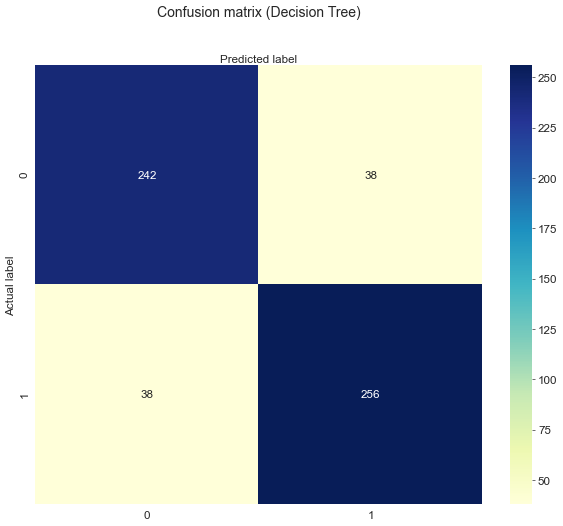

In [94]:
# Visualing the confusion matrix using Heatmap 

DTREE_cnf_matrix = confusion_matrix(y_test, DTREE_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(DTREE_cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix (Decision Tree)", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

## Random Forest Classification

[Random Forest Overview:](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/ "Click on")

1. Widely used in classification and regression problems. It builds a decision tree on different samples and uses majority votes for classification and averaging in the case of regression.
2. Bagging - It creates a different training subset from the sample training data and replaces it, and the final output is based on the majority vote. For example, random forests.
3. Bagging randomly selects a sample from the dataset. Therefore, each model is generated from samples provided by the original data (Bootstrap Samples), with replacements called row sampling. This step of row sampling with replacement is called bootstrapping.
4. Combine the results of all models, and the final output is based on majority vote. This step, which involves combining all the results and producing an output based on a majority vote, is called aggregation.


[Random Forest Pros & Cons:](https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04 "Click on")

Pros:

1. Random forests generally provide high accuracy and balance the bias-variance trade-off well. Since the model works by averaging the results of the multiple decision trees it builds, it also averages the variance.
2. Random forests can handle both linear and nonlinear relationships well.
3. Random forest is suitable for both categorical and numerical data. Scaling or transformation of variables is usually not required.

Cons:

1. Random Forest is like a black box algorithm, you have little control over what the model does.
2. Random forests are not easy to interpret. They provide feature importance, but it does not provide full visibility into coefficients as linear regression.
    

[Random Forest Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html "Click on")

In [95]:
from sklearn.ensemble import RandomForestClassifier

RFC_1 = RandomForestClassifier(n_estimators = 300, bootstrap = True, max_features = 'log2', 
                               max_depth = 7, min_samples_leaf = 4)
RFC_1.fit(X_train, y_train)
RFC_1_pred = RFC_1.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, RFC_1_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, RFC_1_pred),2)*100)
print("Precision: ", round(precision_score(y_test, RFC_1_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, RFC_1_pred), 2)*100)
RFC_CV = (cross_val_score(RFC_1, X_train, y_train, cv=k_fold, n_jobs = 1, scoring = 'accuracy', error_score='raise').mean())

Confusion Matrix: 
	
[[249  31]
 [ 15 279]]
	
Accuracy:  92.0
Precision:  90.0
Recall:  95.0


Text(0.5, 425.7333333333333, 'Predicted label')

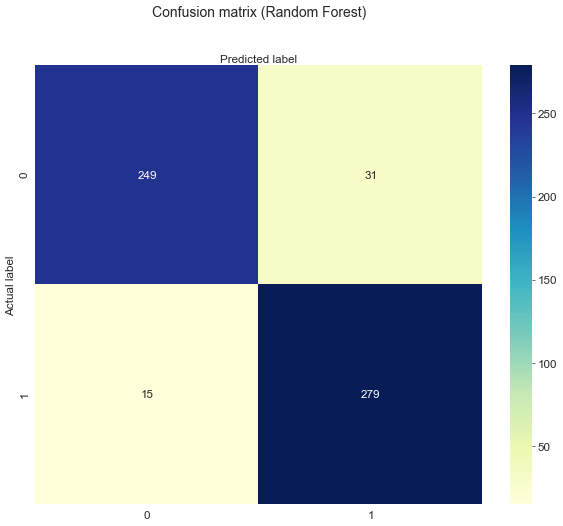

In [96]:
# Visualing the confusion matrix using Heatmap 

RFC_1_cnf_matrix = confusion_matrix(y_test, RFC_1_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(RFC_1_cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix (Random Forest)", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

## XGBoost Classification

[XGBoost Overview:](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/ "Click on")

1. It is an implementation of gradient boosted decision trees, designed for speed and performance, and is the dominant competitive machine learning.
2. The implementation of the algorithm is designed for the efficiency of computation time and memory resources.
3. A sparsity-aware implementation that automatically handles missing data values.
4. Block Structure, which supports parallelization of tree construction.
5. Continue training so that you can further boost the fitted model on new data.

[XGBoost Pros & Cons:](https://towardsdatascience.com/pros-and-cons-of-various-classification-ml-algorithms-3b5bfb3c87d6 "Click on")

Pros:

1. Requires less feature engineering (no scaling, normalized data, also handles missing values well).
2. Feature importance can be found (the importance of each feature is output, which can be used for feature selection).
3. Work with large datasets.

Cons:

1. Difficult to explain, difficult to visualize.
2. If the parameters are not adjusted properly, overfitting may occur.


[XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/index.html "Click on")

In [97]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, XGB_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, XGB_pred),2)*100)
print("Precision: ", round(precision_score(y_test, XGB_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, XGB_pred), 2)*100)
XGB_1 = (cross_val_score(estimator = XGB, X = X_train, y = y_train, cv = 10).mean())

[07:58:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix: 
	
[[252  28]
 [ 16 278]]
	
Accuracy:  92.0
Precision:  91.0
Recall:  95.0
[07:58:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:58:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to res

Text(0.5, 425.7333333333333, 'Predicted label')

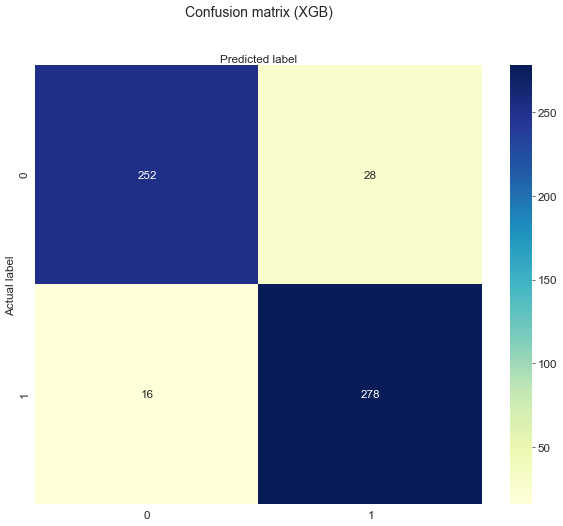

In [98]:
# Visualing the confusion matrix using Heatmap 

XGB_cnf_matrix = confusion_matrix(y_test, XGB_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(XGB_cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix (XGB)", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

## Gradient Boosting Classification

[Gradient Boosting Overview:](https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/ "Click on")

1. It can be used to predict not only continuous target variables (as a regressor) but also categorical target variables (as a classifier). When it's used as a regressor, the cost function is the mean squared error (MSE), and when it's used as a classifier, the cost function is log loss.
2. The algorithm builds models sequentially, and these subsequent models try to reduce the error of the previous model.
3. When the target column is continuous, we use Gradient Boosting Regressor, and when it is a classification problem, we use Gradient Boosting Classifier. The only difference between the two is the "loss function". The goal here is to minimize this loss function by adding a weak learner using gradient descent.
4. Since it is based on loss function, for regression problem we will have different loss function like mean square error (MSE) and for classification we will have different loss function like log-likelihood.


[Gradient Boosting Pros & Cons:](https://analyticsindiamag.com/top-xgboost-interview-questions-for-data-scientists/ "CLick on")

Pros:

1. XGB consists of many hyperparameters that can be tuned - this is a major advantage over gradient boosting machines.
2. XGBoost has built-in functionality to handle missing values.

Cons:

1. Like any other boosting method, XGB is sensitive to outliers.
2. Unlike LightGBM, in XGB, dummy variable/label encoding must be manually created for categorical features before feeding them into the model.


[Gradient Boosting Document|ation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html "Click on")

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

GBK = GradientBoostingClassifier()
GBK.fit(X_train, y_train)
GBK_pred = GBK.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, GBK_pred ))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, GBK_pred),2)*100)
print("Precision: ", round(precision_score(y_test, GBK_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, GBK_pred), 2)*100)
GBK_CV = (cross_val_score(GBK, X_train, y_train, cv=k_fold, n_jobs = 1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[251  29]
 [ 13 281]]
	
Accuracy:  93.0
Precision:  91.0
Recall:  96.0


Text(0.5, 425.7333333333333, 'Predicted label')

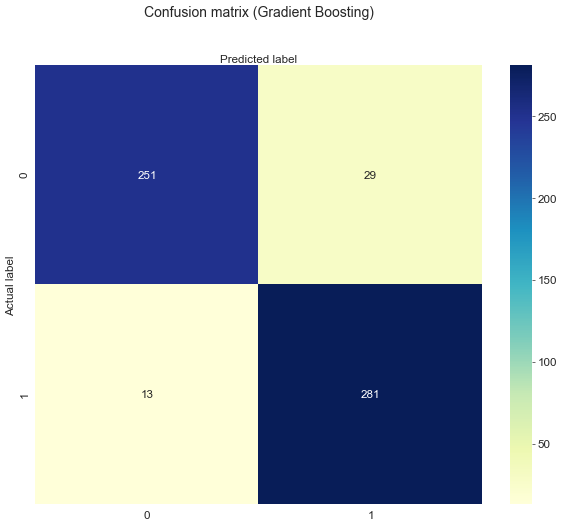

In [100]:
# Visualing the confusion matrix using Heatmap 

GBK_cnf_matrix = confusion_matrix(y_test, GBK_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(GBK_cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix (Gradient Boosting)", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

## K-nearest neighbors classifier (KNN)

[K-nearnest neighbors Overview:](https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning "Click on")

1. KNN can be used for classification and regression prediction problems. However, it is more widely used in the industry for classification problems.
2. Assume the similarity between the new case/data and the available cases and put the new case into the category that is most similar to the available category.
3. It stores all available data and classifies new data points based on similarity. This means that when new data emerges, it can be easily classified into a good suite category by using the K-NN algorithm.

[KNN pros & cons:](https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/ "Click on")

Pros:

1. Simple to understand and equally easy to implement. To classify new data points, the K-NN algorithm reads the entire dataset to find the K nearest neighbors.
2. Most classifier algorithms are easy to implement for binary problems and require effort to implement multiple classes, whereas K-NN can accommodate multiple classes without any additional effort.
3. It may take some time to choose the first hyperparameter, but then the rest of the parameters will align with it.

Cons:

1. K-NN may be easy to implement, but the efficiency or speed of the algorithm drops very quickly as the dataset grows.
2. If you decide to use a common distance to build k-NN, such as Euclidean distance or Manhattan distance, it is absolutely necessary for the features to have the same scale, because the absolute differences of the features have the same weight.
3. The K-NN algorithm is very sensitive to outliers because it simply selects neighbors based on distance criteria.

[K-nearest neighbors documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html "Click on")

k=1 67.90 (+/- 3.36)
k=2 68.17 (+/- 4.34)
k=3 69.95 (+/- 2.91)
k=4 68.91 (+/- 4.18)
k=5 69.21 (+/- 3.52)
k=6 70.47 (+/- 3.89)
k=7 70.95 (+/- 3.67)
k=8 69.69 (+/- 4.40)
k=9 70.13 (+/- 3.99)
k=10 69.69 (+/- 4.35)
k=11 69.65 (+/- 3.78)
k=12 69.39 (+/- 4.56)
k=13 69.69 (+/- 3.96)
k=14 69.47 (+/- 3.55)
k=15 69.86 (+/- 3.37)
k=16 69.86 (+/- 3.96)
k=17 69.82 (+/- 3.46)
k=18 69.43 (+/- 3.75)
k=19 69.12 (+/- 3.96)
k=20 68.82 (+/- 3.03)
k=21 69.34 (+/- 3.36)
k=22 68.90 (+/- 3.57)
k=23 69.82 (+/- 3.47)
k=24 68.90 (+/- 3.94)
k=25 69.38 (+/- 3.80)
The optimal number of neighbors is 6 with 71.0%


Text(0, 0.5, 'Train Accuracy')

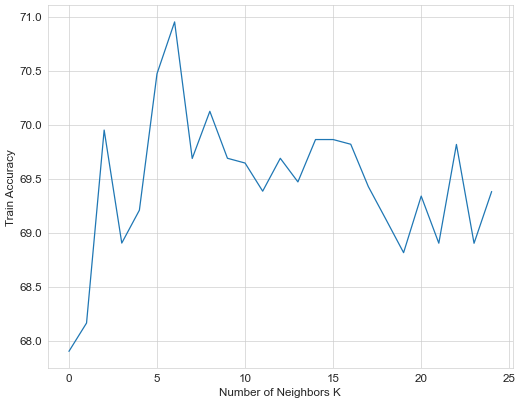

In [101]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(final_df_new, target, test_size = 0.2)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

# Perform 10-fold cross validation on training set for odd values of k:

for k in neighbors:
    k_value = k + 1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights ='uniform', p = 2, metric = 'euclidean')
    kfold = model_selection.KFold(n_splits = 10)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv = kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')

In [102]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 22)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, KNN_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, KNN_pred),2)*100)
print("Precision: ", round(precision_score(y_test, KNN_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, KNN_pred), 2)*100)
KNN_CV = (cross_val_score(knn, X_train, y_train, cv = k_fold, n_jobs = 1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[251  29]
 [ 48 246]]
	
Accuracy:  87.0
Precision:  89.0
Recall:  84.0


Text(0.5, 425.7333333333333, 'Predicted label')

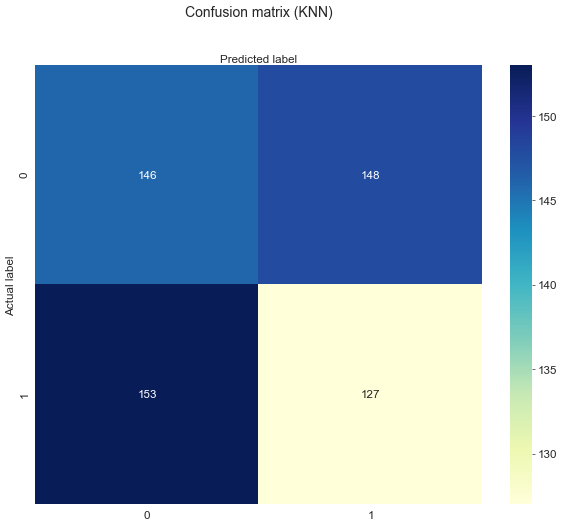

In [103]:
# Visualing the confusion matrix using Heatmap 

KNN_cnf_matrix = confusion_matrix(y_testK, KNN_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(KNN_cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix (KNN)", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

## Gaussian Naive Bayes Model

Gaussian Naive Bayes Overview:

1. Naive Bayes is the simplest and fastest classification method and is very suitable for processing large amounts of information. Naive Bayes classifiers have been shown to be effective in a variety of applications such as spam filtering, text classification, sentiment analysis, and recommender systems.
2. Naive Bayes is a basic but effective probabilistic classification model in machine learning, which is influenced by Bayes' theorem.
3. Naive Bayesian methods assume that predictors contribute equally and independently to the selection of output classes.

[Naive Bayes pros & cons:](https://www.upgrad.com/blog/naive-bayes-classifier/ "Click on")

Pros:

1. It runs very fast and can easily predict the class of the test dataset.
2. Naive Bayes classifiers outperform other models with less training data if the assumption of feature independence holds.
3. It can solve multi-class prediction problems because it is very useful.

Cons:

1. If your test dataset has a categorical variable for a class that is not present in the training dataset, the Naive Bayes model assigns it zero probability and cannot make any predictions in this regard. This phenomenon is called "zero frequency" and you have to use smoothing techniques to fix it.
2. Assume all features are independent. While it sounds great in theory, in real life you'd be hard-pressed to find a separate set of traits.

[Gaussian Naive Bayes Documentation](https://scikit-learn.org/stable/modules/naive_bayes.html "Click on")

In [104]:
from sklearn.naive_bayes import GaussianNB

GAUSS = GaussianNB()
GAUSS.fit(X_train, y_train)
GAUSS_pred = GAUSS.predict(X_test)
probs = GAUSS.predict(X_test)

print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test, GAUSS_pred))
print("\t")
print("Accuracy: ", round(accuracy_score(y_test, GAUSS_pred),2)*100)
print("Precision: ", round(precision_score(y_test, GAUSS_pred), 2)*100)
print("Recall: ", round(recall_score(y_test, GAUSS_pred), 2)*100)
GAUSIAN_CV = (cross_val_score(GAUSS, X_train, y_train, cv = k_fold, n_jobs = 1, scoring = 'accuracy').mean())

Confusion Matrix: 
	
[[260  20]
 [181 113]]
	
Accuracy:  65.0
Precision:  85.0
Recall:  38.0


Text(0.5, 425.7333333333333, 'Predicted label')

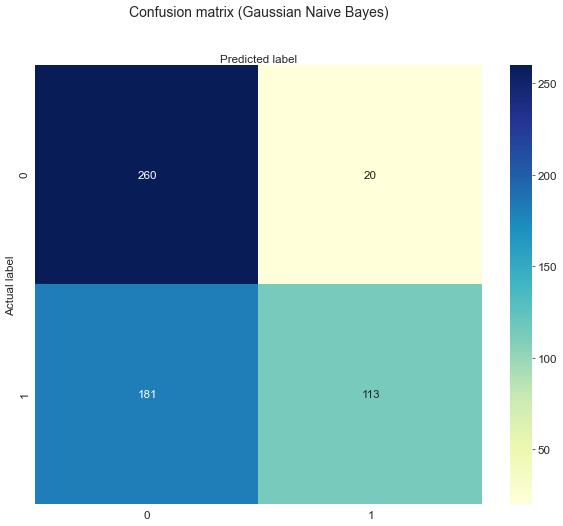

In [105]:
# Visualing the confusion matrix using Heatmap 

GAUSS_cnf_matrix = confusion_matrix(y_test, GAUSS_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(GAUSS_cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix (Gaussian Naive Bayes)", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

### Display all Machine Learning model

In [142]:
Models = pd.DataFrame({
                'Models': ['Logistic Model',  'Support Vector Machine', 'Decision Tree Classifier', 
                           'Random Forest Classifier', 'XGBoost', 'Gradient Boosting', 'KNN', 
                           'Gaussian Naive Bayes'],
                'Score':  [LOG_CV, SVC_1, DTREE_CV, RFC_CV, XGB_1, GBK_CV, KNN_CV, GAUSIAN_CV]})

Models.sort_values(by='Score', ascending=False)

Models     Score
5         Gradient Boosting  0.929294
4                   XGBoost  0.928147
3  Random Forest Classifier  0.926684
2  Decision Tree Classifier  0.894159
6                       KNN  0.872526
0            Logistic Model  0.707748
7      Gaussian Naive Bayes  0.671007
1    Support Vector Machine  0.646483

## Learning curve

[Oveview:](https://vitalflux.com/learning-curves-explained-python-sklearn-example/ "Click on")

1. It is used to evaluate the performance of the model under different numbers of training samples
2. It does this by monitoring the training and validation scores (model accuracy) as the number of training samples increases.

The two most common learning curves in our machine learning models:

1. Underfitting (high bias model):

The training and cross-validation accuracy of this model is low. It indicates that the model is underfitting the training data, and thus, in the case of high bias. We can notice that as the training sample size increases, the training accuracy decreases while the validation accuracy increases. However, the validation accuracy was far from the desired accuracy.


2. How to solve underfitting:

Add more features: increase the number of parameters of the model, e.g. by creating additional features

Decrease regularization: Decrease the regularization, for example, in a support vector machine (SVM) or logistic regression classifier.


3. Overfitting (high variance model):

The model has a large gap between training and validation accuracy. The training accuracy is greater than the validation accuracy. You may notice that as the training sample size increases, the training accuracy decreases while the validation accuracy increases. However, the training accuracy is much higher than the validation accuracy and desired accuracy.

4. How to solve overfitting:

Add more data: Gather more training data; this may not always help, although adding more data may cause noise.

Remove less important features: reduce model complexity by removing noisy features; for non-regularized models, you can use feature selection or feature extraction techniques to reduce the number of features

Increase the regularization parameter, for example, in a support vector machine (SVM) or logistic regression classifier.

### Display all the model learning curve

Logistic Regression

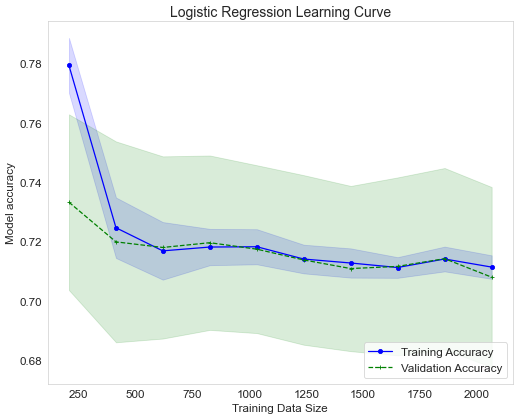

In [107]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = LOG_model, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Support Vector Machine Classification

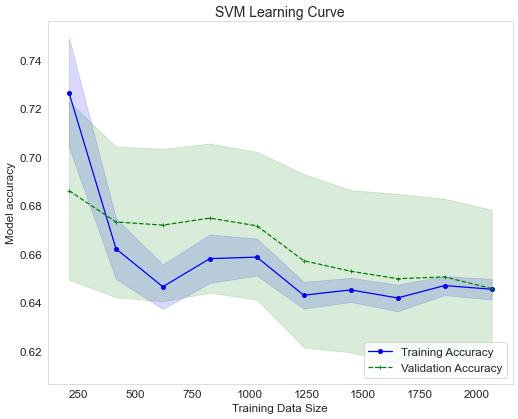

In [143]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = SVM, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('SVM Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Decision Tree Classification

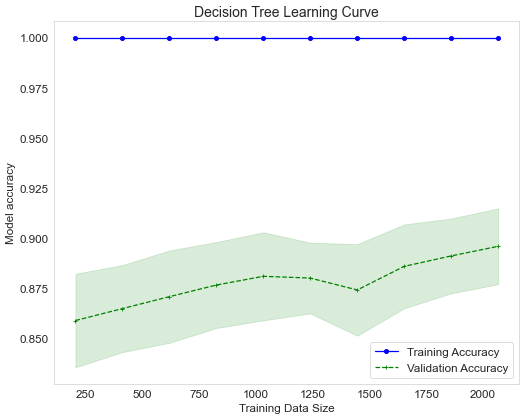

In [109]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = DTREE, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Decision Tree Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Random Forest Classification

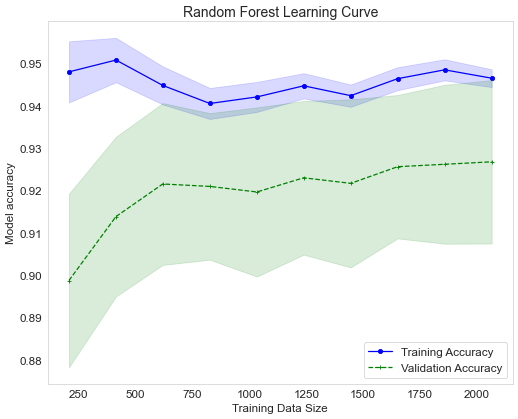

In [110]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = RFC_1, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color ='blue')
plt.plot(train_sizes, test_mean, color='green', marker = '+', markersize=5, linestyle='--', label ='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color= 'green')
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

XGboost

[08:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

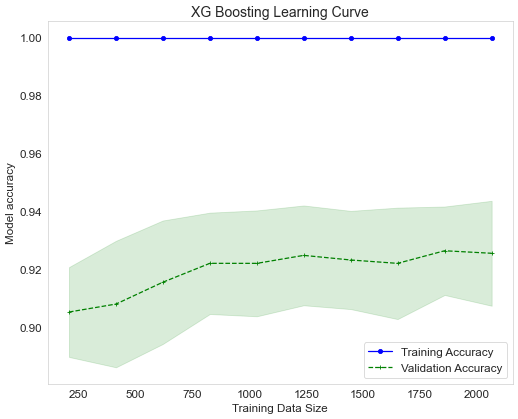

In [111]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = XGB, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)
#
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color ='blue')
plt.plot(train_sizes, test_mean, color='green', marker = '+', markersize=5, linestyle = '--', label ='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'green')
plt.title('XG Boosting Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

Gradient Boosting Classification

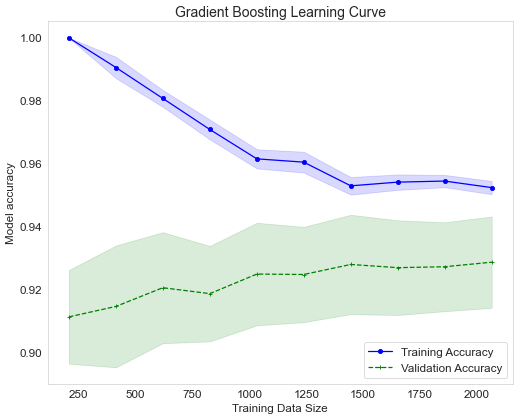

In [112]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = GBK, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)
#
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color ='blue')
plt.plot(train_sizes, test_mean, color='green', marker = '+', markersize=5, linestyle = '--', label ='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'green')
plt.title('Gradient Boosting Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

KNN

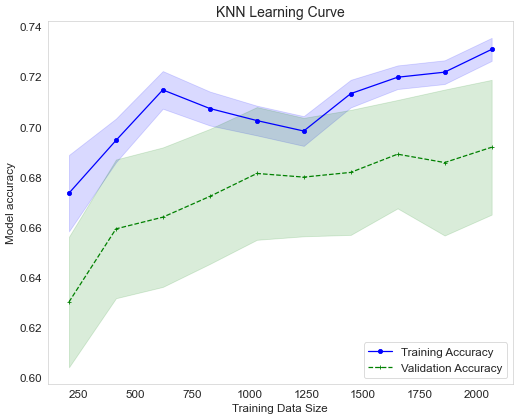

In [113]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = KNN, X = X_trainK, y = y_trainK,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)
#
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color ='blue')
plt.plot(train_sizes, test_mean, color='green', marker = '+', markersize = 5, linestyle = '--', label ='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'green')
plt.title('KNN Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

Gaussian Naive Bayes

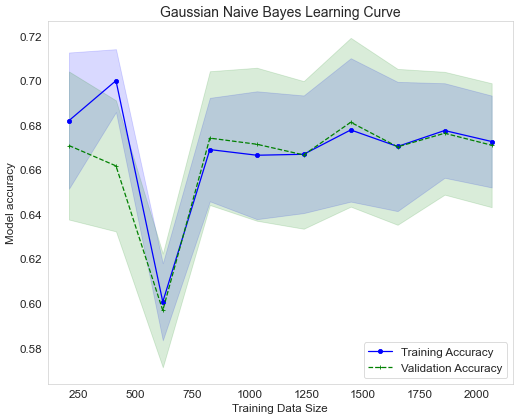

In [154]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = GAUSS, X = X_train, y = y_train,
                                                       cv = k_fold, train_sizes = np.linspace(0.1, 1.0, 10), n_jobs=1)
#
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color ='blue')
plt.plot(train_sizes, test_mean, color='green', marker = '+', markersize = 5, linestyle = '--', label ='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'green')
plt.title('Gaussian Naive Bayes Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

Overall I think the SVM, Logistic, and Gaussian Naive Bayes Models are better because they are neither overfitting nor underfitting, which means their training and validation curves are normal. And other models are not, which means other models may have overfitting or underfitting.

## Precision Recall Curve

1. The precision-recall curves show the trade-off between precision and recall for different thresholds. 
2. The large area under the curve represents high recall and high precision, where high precision is associated with a low false positive rate, and high recall is correlated with a low false positive rate.

[Precision Recall Documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate. "Click on")

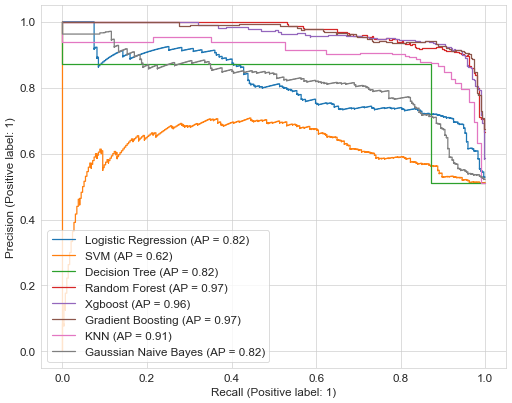

In [118]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(LOG_model, X_test, y_test, ax = plt.gca(), name = 'Logistic Regression')

plot_precision_recall_curve(SVM, X_test, y_test, ax = plt.gca(), name = 'SVM')

plot_precision_recall_curve(DTREE, X_test, y_test, ax = plt.gca(), name = 'Decision Tree')

plot_precision_recall_curve(RFC_1, X_test, y_test, ax = plt.gca(), name = 'Random Forest')

plot_precision_recall_curve(XGB, X_test, y_test, ax = plt.gca(), name = 'Xgboost')

plot_precision_recall_curve(GBK, X_test, y_test, ax = plt.gca(), name = 'Gradient Boosting')

plot_precision_recall_curve(KNN, X_test, y_test, ax = plt.gca(), name = 'KNN')

plot_precision_recall_curve(GAUSS, X_test, y_test, ax = plt.gca(), name = 'Gaussian Naive Bayes')

Based on the precision-recall curve, it obvious the "Random Forest" and "Gradient Boosting" are the highest AP score, which means models are performing better than others.

# Evaluating the model

[Several ways to evaluate the machine model performance:](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/#:~:text=Accuracy%20%3A%20the%20proportion%20of%20the,cases%20that%20were%20correctly%20identified. "Click on")

1. Confusion Matrix
2. F-1 Score
3. AUC-ROC

Confusion Matrix:

--- A confusion matrix is an N X N matrix, where N is the number of classes being predicted. For the problem in hand, we have N=2, and hence we get a 2 X 2 matrix.

1. Accuracy : the proportion of the total number of predictions that were correct.
2. Positive Predictive Value or Precision : the proportion of positive cases that were correctly identified.
3. Negative Predictive Value : the proportion of negative cases that were correctly identified.
4. Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
5. Specificity : the proportion of actual negative cases which are correctly identified.
6. In general we are concerned with one of the above defined metric. For instance, in a pharmaceutical company, they will be more concerned with minimal wrong positive diagnosis. Hence, they will be more concerned about high Specificity. On the other hand an attrition model will be more concerned with Sensitivity. Confusion matrix are generally used only with class output models.

[F-1 Score:](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/#:~:text=F1%20Score,the%20precision%20and%20the%20recall. "Click on")

1. It is the harmonic mean of precision and recall values for a classification problem.
2. It is the 2*((precision*recall)/(precision+recall)). It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall.
3. The F1 for the All No Recurrence model is 2*((0*0)/0+0) or 0.
4. The F1 for the All Recurrence model is 2*((0.3*1)/0.3+1) or 0.46.
5. The F1 for the CART model is 2*((0.43*0.12)/0.43+0.12) or 0.19.


AUC & ROC:

1. The biggest advantage of using ROC curve is that it is independent of the change in proportion of responders.
2. The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate.
3. .90-1 = excellent (A)
4. .80-.90 = good (B)
5. .70-.80 = fair (C)
6. .60-.70 = poor (D)
7. .50-.60 = fail (F)

[AUC (Area under the ROC curve) score:](https://classeval.wordpress.com/introduction/introduction-to-the-roc-receiver-operating-characteristics-plot/ "Click on")

1. Using the ROC plot is a single measure called the AUC (area under the ROC curve) score. As the name indicates, it is an area under the curve calculated in the ROC space. One of the easy ways to calculate the AUC score is using the trapezoidal rule, which is adding up all trapezoids under the curve.
2. The theoretical range of AUC score is between 0 and 1, the actual scores of meaningful classifiers are greater than 0.5, which is the AUC score of a random classifier.



## ROC & AUC

Visualize ROC & AUC:

1. Logistics Regression Model
2. Random Forest Model
3. XGBOOST
4. Decision Tree Model
5. Gradient Boosting
6. Support Vector Machine
7. K-nearest neighbors
8. Gaussian Naive Bayes

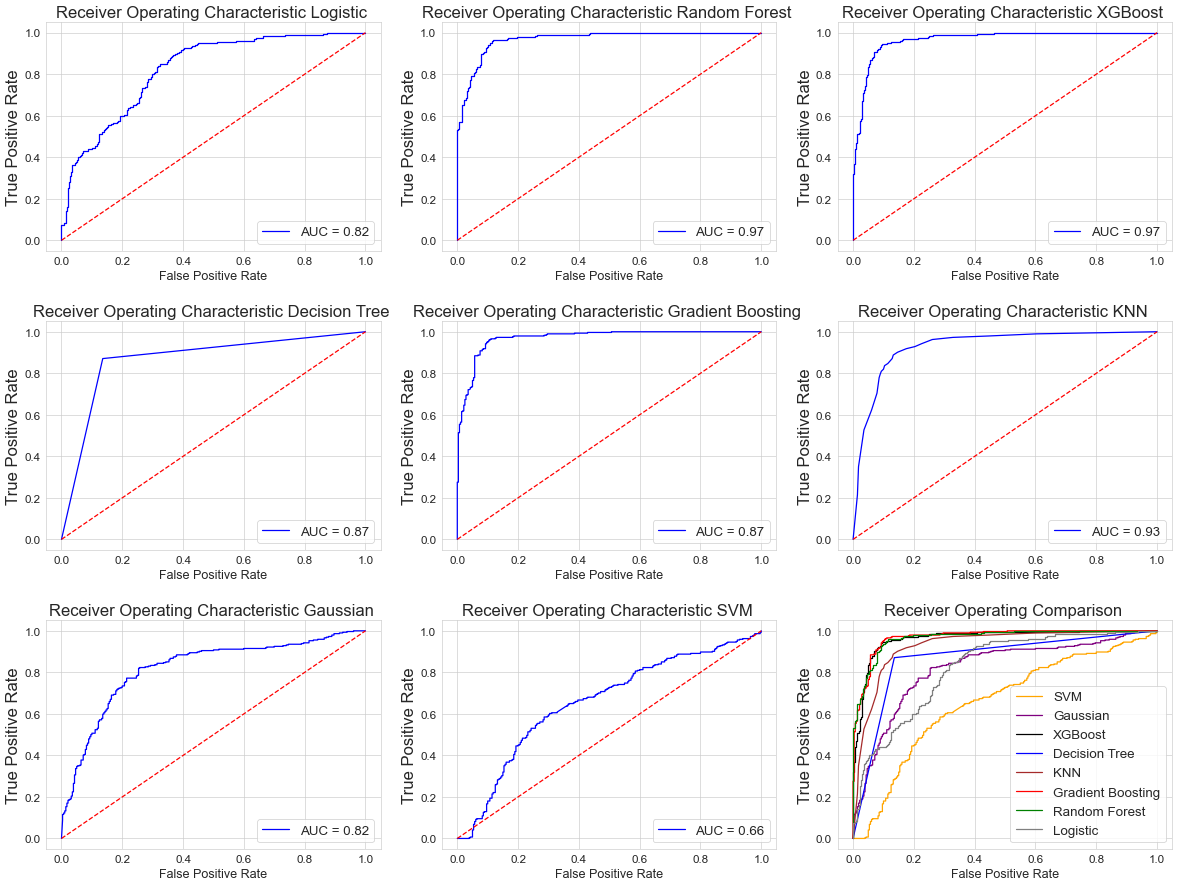

In [152]:
from sklearn import metrics

fig, ax_arr = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))

## Logistics Regression Model

probs = LOG_model.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize = 20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[0,0].legend(loc = 'lower right', prop = {'size': 16})

### Random Forest Model

probs = RFC_1.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize = 20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[0,1].legend(loc = 'lower right', prop = {'size': 16})

### XGBOOST

probs = XGB.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[0,2].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic XGBoost ',fontsize = 20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[0,2].legend(loc = 'lower right', prop = {'size': 16})


### Decision Tree Model

probs = DTREE.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize = 20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[1,0].legend(loc = 'lower right', prop = {'size': 16})

## Gradient Boosting

probs = GBK.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax_arr[1,1].plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gradient Boosting ',fontsize = 20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[1,1].legend(loc = 'lower right', prop = {'size': 16})


### KNN Model

probs = KNN.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('Receiver Operating Characteristic KNN ',fontsize = 20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[1,2].legend(loc = 'lower right', prop = {'size': 16})


### Gaussian Model

probs = GAUSS.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[2,0].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[2,0].plot([0, 1], [0, 1],'r--')
ax_arr[2,0].set_title('Receiver Operating Characteristic Gaussian ',fontsize = 20)
ax_arr[2,0].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[2,0].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[2,0].legend(loc = 'lower right', prop = {'size': 16})


### SVM

probs = SVM.predict_proba(X_test)
preds = probs[:,1]
fprsvm, tprsvm, thresholdsvm = metrics.roc_curve(y_test, preds)
roc_aucsvm = metrics.auc(fprsvm, tprsvm)

ax_arr[2,1].plot(fprsvm, tprsvm, 'b', label = 'AUC = %0.2f' % roc_aucsvm)
ax_arr[2,1].plot([0, 1], [0, 1],'r--')
ax_arr[2,1].set_title('Receiver Operating Characteristic SVM ',fontsize = 20)
ax_arr[2,1].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[2,1].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[2,1].legend(loc = 'lower right', prop = {'size': 16})

# ### All plots

ax_arr[2,2].plot(fprsvm, tprsvm, 'b', label = 'SVM', color = 'orange')
ax_arr[2,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color = 'purple')
ax_arr[2,2].plot(fprxgb, tprxgb, 'b', label = 'XGBoost', color = 'black')
ax_arr[2,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color = 'blue')
ax_arr[2,2].plot(fprknn, tprknn, 'b', label = 'KNN', color = 'brown')
ax_arr[2,2].plot(fprgbk, tprgbk, 'b', label = 'Gradient Boosting', color = 'red')
ax_arr[2,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color = 'green')
ax_arr[2,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color = 'grey')
ax_arr[2,2].set_title('Receiver Operating Comparison ',fontsize = 20)
ax_arr[2,2].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[2,2].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[2,2].legend(loc = 'lower right', prop = {'size': 16})

plt.subplots_adjust(wspace = 2, hspace = 1)
plt.tight_layout() 

ROC & AUC Ouput

1. Based on our ROC & AUC output, "Random Forest" & "XGBoost" are the highest AUC, which is 0.97.
2. However, based on the learning curve, both "Random Forest" & "XGBoost" are overfitting (Training curve is higher than the validation curve), which means they low bias but high variance.

# Conclusion

Learning Curve, Precision-Recall Curve, ROC, and RUC

1. Based on the learning curve, we choose three machine learning models, which are SVM, Logistic, and Gaussian Naive Bayes. Because they perform better than other models. In other words, they do not have any overfitting or underfitting
2. Based on Precision-Recall Curve, we have the two highest AP scores, which are Random Forest and Gradient Boosting. However, we have already eliminated these two models because they are overfitting. Thus, we only need to compare SVM, Logistic and Gaussian Naive Bayes, based on these three models, the highest AP score is Logistic Regression and Gaussian Naive Bayes.
3. Lastly, ROC & AUC report shows that "Random Forest" and "XGBoost" have the highest AUC scores, which is 0.97. However, we have already removed these two models from our list because at first, we noticed that they are overfitting. And both Logistic Regression and Gaussian Naive Bayes have the same AUC score. Thus, we can choose either one as our best machine learning model

Further:

If we want to apply the data science area and to solve a problem, which is to predict hotel availability (In this case), then we can use "Logistic Regression" and "Gaussian Naive Bayes" to predict. Because both models perform better than others. In other words, we can use both models to help Travel Express identify the hotels that accept bookings 365 days a year.